# Library / Packages

In [601]:
import os
import pandas as pd
import numpy as np
import hashlib

# Graph
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# String and .env
from dotenv import load_dotenv, dotenv_values
from io import StringIO

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Regressions
from sklearn.linear_model import LinearRegression

# smoothing forecasting
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Dataset

## Cab Dataset

In [602]:
# parameter
link = {**dotenv_values('.env.secret')}
cab_data_path = link['CAB_DATA']

# filter missing values
missing_val = ['N/a', 'n/a', 'No', 'N\a', 'na', 'NA', np.nan]

# load data to df
cab_df = pd.read_csv(cab_data_path, sep = ';', na_values = missing_val)
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01/02/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,01/07/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01/03/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## City Dataset

In [603]:
# parameter
link = {**dotenv_values('.env.secret')}
city_path = link['CITY']

# filter missing values
missing_val = ['N/a', 'n/a', 'No', 'N\a', 'na', 'NA', np.nan]

# load data to df
city_df = pd.read_csv(city_path, sep = ';', na_values = missing_val)
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


## Customer ID Dataset

In [604]:
# parameter
link = {**dotenv_values('.env.secret')}
customer_id_path = link['CUSTOMER_ID']

# filter missing values
missing_val = ['N/a', 'n/a', 'No', 'N\a', 'na', 'NA', np.nan]

# load data to df
customer_id_df = pd.read_csv(customer_id_path, sep = ';', na_values = missing_val)
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


## Transaction ID Dataset

In [605]:
# parameter
link = {**dotenv_values('.env.secret')}
transaction_id_path = link['TRANSACTION_ID']

# filter missing values
missing_val = ['N/a', 'n/a', 'No', 'N\a', 'na', 'NA', np.nan]

# load data to df
transaction_id_df = pd.read_csv(transaction_id_path, sep = ';', na_values = missing_val)
transaction_id_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## US Holiday Dataset

In [606]:
# parameter
link = {**dotenv_values('.env.secret')}
us_holiday_path = link['US_HOLIDAY']

# filter missing values
missing_val = ['N/a', 'n/a', 'No', 'N\a', 'na', 'NA', np.nan]

# load data to df
us_holiday_df = pd.read_csv(us_holiday_path, sep = ';', na_values = missing_val)
us_holiday_df.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,07/04/04,Independence Day,Sunday,7,4,2004
1,07/04/05,Independence Day,Monday,7,4,2005
2,07/04/06,Independence Day,Tuesday,7,4,2006
3,07/04/07,Independence Day,Wednesday,7,4,2007
4,07/04/08,Independence Day,Friday,7,4,2008


# Data Cleaning

## Cab Dataframe

In [607]:
# Check Data type
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [608]:
# Check Null Value
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [609]:
# check general duplicate
print(f'Total General Duplicate: {cab_df.duplicated().sum()}')

Total General Duplicate: 0


In [610]:
# check specific duplicate
print(f'Total Specific Duplicate: {cab_df["Transaction ID"].duplicated().sum()}')

Total Specific Duplicate: 0


In [611]:
# Change Data Type
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'], format = 'mixed', dayfirst = True)

In [612]:
# float format
float_format = ['KM Travelled', 'Price Charged', 'Cost of Trip']

# Round data
for column in float_format: 
    cab_df[column] = cab_df[column].round(2)

# String format
string_format = ['Company', 'City']

# Lower and Upper data 
for column in string_format: 
    cab_df[column] = cab_df[column].str.lower()

# Remove Regex Char 
for column in string_format: 
    cab_df[column] = cab_df[column].str.replace(r'\W', '') 

# Remove Over White Space 
for column in string_format: 
    cab_df[column] = cab_df[column].str.strip() 

# Column Rename 
rename_format = {'Transaction ID': 'trx_id', 'Date of Travel': 'date', 'Company': 'company', 'City': 'city', 'KM Travelled': 'travel(km)',
       'Price Charged': 'charged', 'Cost of Trip': 'cost'} 
cab_df = cab_df.rename(columns = rename_format)

# Add New Parameter
cab_df['profit'] = cab_df['charged'] - cab_df['cost']

# See unique value
print(f'Is this data unique: {cab_df["trx_id"].is_unique}')

# See all data
cab_df.describe(include = 'all').round(2)

Is this data unique: True


,trx_id,date,company,city,travel(km),charged,cost,profit
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00
unique,NaN,NaN,2,19,NaN,NaN,NaN,NaN
top,NaN,NaN,yellow cab,new york ny,NaN,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN,NaN
mean,10220761.19,2017-08-06 21:15:50.324993536,NaN,NaN,22.57,423.44,286.19,137.25
min,10000011.00,2016-01-02 00:00:00,NaN,NaN,1.90,15.60,19.00,-220.06
25%,10110809.75,2016-11-18 00:00:00,NaN,NaN,12.00,206.44,151.20,28.01
50%,10221035.50,2017-08-22 00:00:00,NaN,NaN,22.44,386.36,282.48,81.96
75%,10330937.25,2018-05-01 00:00:00,NaN,NaN,32.96,583.66,413.68,190.03
max,10440107.00,2018-12-31 00:00:00,NaN,NaN,48.00,2048.03,691.20,1463.97


In [613]:
# Implement filtering
cab_df = cab_df.loc[cab_df['profit'] >=  0]

# See all data
cab_df.describe(include = 'all').round(2)

,trx_id,date,company,city,travel(km),charged,cost,profit
count,334575.00,334575,334575,334575,334575.00,334575.00,334575.00,334575.00
unique,NaN,NaN,2,19,NaN,NaN,NaN,NaN
top,NaN,NaN,yellow cab,new york ny,NaN,NaN,NaN,NaN
freq,NaN,NaN,260992,99432,NaN,NaN,NaN,NaN
mean,10220558.04,2017-08-06 09:54:09.764626688,NaN,NaN,22.57,435.26,286.37,148.89
min,10000011.00,2016-01-02 00:00:00,NaN,NaN,1.90,19.83,19.00,0.00
25%,10110849.50,2016-11-17 00:00:00,NaN,NaN,12.00,214.42,151.32,37.09
50%,10221501.00,2017-08-22 00:00:00,NaN,NaN,22.47,400.74,282.74,92.25
75%,10329939.50,2018-05-01 00:00:00,NaN,NaN,32.96,600.14,413.95,202.71
max,10440107.00,2018-12-31 00:00:00,NaN,NaN,48.00,2048.03,691.20,1463.97


## City Dataframe

In [614]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [615]:
# Check Null Value
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [616]:
# Check General Duplicate
print(f'Total General Duplicate: {city_df.duplicated().sum()}')

Total General Duplicate: 0


In [617]:
# Check Specific Duplicate
print(f'Total Specific Duplicate: {city_df["City"].duplicated().sum()}')

Total Specific Duplicate: 0


In [618]:
# format string
string_format = ['City']

# Lower and Upper data 
for column in string_format: 
    city_df[column] = city_df[column].str.lower()

# Remove Regex Char 
for column in string_format: 
    city_df[column] = city_df[column].str.replace(r'\W', '') 

# Remove Over White Space 
for column in string_format: 
    city_df[column] = city_df[column].str.strip() 

# Column Rename 
rename_format = {'City': 'city', 'Population': 'population', 'Users': 'users'} 
city_df = city_df.rename(columns = rename_format)

# Add New Parameter
city_df['non_users'] = city_df['population'] - city_df['users']

# See unique value
print(f'Is this data unique: {city_df["city"].is_unique}')

# See all data
city_df.describe(include = 'all').round(2)

Is this data unique: True


,city,population,users,non_users
count,20,20.00,20.00,20.00
unique,20,NaN,NaN,NaN
top,new york ny,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1231592.00,64520.65,1167071.35
std,NaN,1740126.70,83499.38,1682441.98
min,NaN,248968.00,3643.00,168947.00
25%,NaN,608637.25,11633.25,538659.50
50%,NaN,784559.00,23429.00,765998.00
75%,NaN,1067041.00,91766.00,1050483.75


## Customer ID Dataframe

In [619]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [620]:
# Check Null Value
customer_id_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [621]:
# Check general Duplicate
print(f'Total General Duplicate: {customer_id_df.duplicated().sum()}')

Total General Duplicate: 0


In [622]:
# Check Specific Duplicate
print(f'Total Specific Duplicate: {customer_id_df["Customer ID"].duplicated().sum()}')

Total Specific Duplicate: 0


In [623]:
# string format
string_format = ['Gender']

# Lower and Upper data 
for column in string_format: 
    customer_id_df[column] = customer_id_df[column].str.lower()

# Remove Regex Char 
for column in string_format: 
    customer_id_df[column] = customer_id_df[column].str.replace(r'\W', '') 

# Remove Over White Space 
for column in string_format: 
    customer_id_df[column] = customer_id_df[column].str.strip() 

# Column Rename 
rename_format = {'Customer ID': 'cust_id', 'Gender': 'gender', 'Age': 'age', 'Income (USD/Month)': 'income_usd/month'} 
customer_id_df = customer_id_df.rename(columns = rename_format)

# See unique value
print(f'Is this data unique: {customer_id_df["cust_id"].is_unique}')

# See all data
customer_id_df.describe(include = 'all').round(2)

Is this data unique: True


,cust_id,gender,age,income_usd/month
count,49171.00,49171,49171.00,49171.00
unique,NaN,2,NaN,NaN
top,NaN,male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.25,NaN,35.36,15015.63
std,17714.14,NaN,12.60,8002.21
min,1.00,NaN,18.00,2000.00
25%,12654.50,NaN,25.00,8289.50
50%,27631.00,NaN,33.00,14656.00
75%,43284.50,NaN,42.00,21035.00


## Transaction ID Dataframe

In [624]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [625]:
# Check Null Value
transaction_id_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [626]:
# Check Duplicate
print(f'Total General Duplicate: {transaction_id_df.duplicated().sum()}')

Total General Duplicate: 0


In [627]:
# Check Specific Duplicate
print(f'Total Specific Duplicate: {transaction_id_df["Transaction ID"].duplicated().sum()}')

Total Specific Duplicate: 0


In [628]:
# string format
string_format = ['Payment_Mode']

# Lower and Upper data 
for column in string_format: 
    transaction_id_df[column] = transaction_id_df[column].str.lower()

# Remove Regex Char 
for column in string_format: 
    transaction_id_df[column] = transaction_id_df[column].str.replace(r'\W', '') 

# Remove Over White Space 
for column in string_format: 
    transaction_id_df[column] = transaction_id_df[column].str.strip() 

# Column Rename 
rename_format = {'Transaction ID': 'trx_id', 'Customer ID': 'cust_id', 'Payment_Mode': 'payment'} 
transaction_id_df = transaction_id_df.rename(columns = rename_format)

# See unique value
print(f'Is this data unique: {transaction_id_df["trx_id"].is_unique}')

# See all data
transaction_id_df.describe(include = 'all').round(2)

Is this data unique: True


,trx_id,cust_id,payment
count,440098.00,440098.00,440098
unique,NaN,NaN,2
top,NaN,NaN,card
freq,NaN,NaN,263991
mean,10220059.50,23619.51,NaN
std,127045.49,21195.55,NaN
min,10000011.00,1.00,NaN
25%,10110035.25,3530.00,NaN
50%,10220059.50,15168.00,NaN
75%,10330083.75,43884.00,NaN


## US Holiday Datarame

In [629]:
us_holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [630]:
# Check Null Value
us_holiday_df.isnull().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

In [631]:
# Check Duplicate
print(f'Total Duplicate: {us_holiday_df.duplicated().sum()}')

Total Duplicate: 0


In [632]:
# Check Specific Duplicate
print(f'Total Duplicate: {us_holiday_df["Date"].duplicated().sum()}')

Total Duplicate: 6


In [633]:
# Drop duplicate for specific column
us_holiday_df.drop_duplicates(subset = 'Date', inplace = True)

# Check Specific Duplicate
print(f'Total Duplicate: {us_holiday_df["Date"].duplicated().sum()}')

Total Duplicate: 0


In [634]:
# Change Data Type
us_holiday_df['Date'] = pd.to_datetime(us_holiday_df['Date'], format = 'mixed', dayfirst = True)

In [635]:
# string format
string_format = ['Holiday', 'WeekDay']

# Lower and Upper data 
for column in string_format: 
    us_holiday_df[column] = us_holiday_df[column].str.lower()

# Remove Regex Char 
for column in string_format: 
    us_holiday_df[column] = us_holiday_df[column].str.replace(r'\W', '') 

# Remove Over White Space 
for column in string_format: 
    us_holiday_df[column] = us_holiday_df[column].str.strip() 

# Column Rename 
rename_format = {'Date': 'date', 'Holiday': 'holiday', 'WeekDay': 'weekday', 'Month': 'month', 'Day': 'day', 'Year': 'year'} 
us_holidays_df = us_holiday_df.rename(columns = rename_format)

# See unique value
print(f'Is this data unique: {us_holidays_df["date"].is_unique}')

# See all data
us_holidays_df.describe(include = 'all').round(2)

Is this data unique: True


,date,holiday,weekday,month,day,year
count,336,336,336,336.00,336.00,336.00
unique,NaN,18,7,NaN,NaN,NaN
top,NaN,labor day weekend,monday,NaN,NaN,NaN
freq,NaN,36,109,NaN,NaN,NaN
mean,2013-01-13 03:51:25.714285824,NaN,NaN,7.32,15.89,2012.54
min,2004-01-01 00:00:00,NaN,NaN,1.00,1.00,2004.00
25%,2008-08-12 00:00:00,NaN,NaN,4.00,6.00,2008.00
50%,2013-01-05 00:00:00,NaN,NaN,9.00,17.00,2013.00
75%,2017-06-03 06:00:00,NaN,NaN,11.00,24.00,2017.00
max,2021-12-31 00:00:00,NaN,NaN,12.00,31.00,2021.00


# Data Manipulation

## Merge Data

In [636]:
# cab df with city df
mg_1 = cab_df.merge(city_df, how = 'inner', on = 'city')
print(mg_1.to_string)

<bound method DataFrame.to_string of           trx_id       date     company        city  travel(km)  charged  \
0       10000011 2016-08-01    pink cab  atlanta ga       30.45   370.95   
1       10000012 2016-06-01    pink cab  atlanta ga       28.62   358.52   
2       10000013 2016-02-01    pink cab  atlanta ga        9.04   125.20   
3       10000014 2016-07-01    pink cab  atlanta ga       33.17   377.40   
4       10000015 2016-03-01    pink cab  atlanta ga        8.73   114.62   
...          ...        ...         ...         ...         ...      ...   
334570  10438290 2018-05-01  yellow cab   denver co        5.20    92.67   
334571  10438291 2018-04-01  yellow cab   denver co       30.16   432.77   
334572  10438292 2018-05-01  yellow cab   denver co       31.32   556.70   
334573  10438293 2018-07-01  yellow cab   denver co       37.74   628.88   
334574  10438294 2018-05-01  yellow cab   denver co       32.20   602.15   

          cost  profit  population  users  non_use

In [637]:
# mg 1 with trx df
mg_2 = mg_1.merge(transaction_id_df, how = 'inner', on = 'trx_id')
print(mg_2.to_string)

<bound method DataFrame.to_string of           trx_id       date     company        city  travel(km)  charged  \
0       10000011 2016-08-01    pink cab  atlanta ga       30.45   370.95   
1       10000012 2016-06-01    pink cab  atlanta ga       28.62   358.52   
2       10000013 2016-02-01    pink cab  atlanta ga        9.04   125.20   
3       10000014 2016-07-01    pink cab  atlanta ga       33.17   377.40   
4       10000015 2016-03-01    pink cab  atlanta ga        8.73   114.62   
...          ...        ...         ...         ...         ...      ...   
334570  10438290 2018-05-01  yellow cab   denver co        5.20    92.67   
334571  10438291 2018-04-01  yellow cab   denver co       30.16   432.77   
334572  10438292 2018-05-01  yellow cab   denver co       31.32   556.70   
334573  10438293 2018-07-01  yellow cab   denver co       37.74   628.88   
334574  10438294 2018-05-01  yellow cab   denver co       32.20   602.15   

          cost  profit  population  users  non_use

In [638]:
# mg 2 with customer df
mg_3 = mg_2.merge(customer_id_df, how = 'inner', on = 'cust_id')
print(mg_3.to_string)

<bound method DataFrame.to_string of           trx_id       date     company        city  travel(km)  charged  \
0       10000011 2016-08-01    pink cab  atlanta ga       30.45   370.95   
1       10351127 2018-07-21  yellow cab  atlanta ga       26.19   598.70   
2       10412921 2018-11-23  yellow cab  atlanta ga       42.55   792.05   
3       10000012 2016-06-01    pink cab  atlanta ga       28.62   358.52   
4       10320494 2018-04-21  yellow cab  atlanta ga       36.38   721.10   
...          ...        ...         ...         ...         ...      ...   
334570  10438275 2018-03-01  yellow cab   denver co       47.20   691.85   
334571  10438283 2018-06-01  yellow cab   denver co       35.64   604.89   
334572  10438292 2018-05-01  yellow cab   denver co       31.32   556.70   
334573  10438293 2018-07-01  yellow cab   denver co       37.74   628.88   
334574  10438294 2018-05-01  yellow cab   denver co       32.20   602.15   

          cost  profit  population  users  non_use

In [639]:
# mg 3 with us holiday df
mg_4 = mg_3.merge(us_holidays_df, how = 'left', on = 'date')
print(mg_4.to_string)

<bound method DataFrame.to_string of           trx_id       date     company        city  travel(km)  charged  \
0       10000011 2016-08-01    pink cab  atlanta ga       30.45   370.95   
1       10351127 2018-07-21  yellow cab  atlanta ga       26.19   598.70   
2       10412921 2018-11-23  yellow cab  atlanta ga       42.55   792.05   
3       10000012 2016-06-01    pink cab  atlanta ga       28.62   358.52   
4       10320494 2018-04-21  yellow cab  atlanta ga       36.38   721.10   
...          ...        ...         ...         ...         ...      ...   
334570  10438275 2018-03-01  yellow cab   denver co       47.20   691.85   
334571  10438283 2018-06-01  yellow cab   denver co       35.64   604.89   
334572  10438292 2018-05-01  yellow cab   denver co       31.32   556.70   
334573  10438293 2018-07-01  yellow cab   denver co       37.74   628.88   
334574  10438294 2018-05-01  yellow cab   denver co       32.20   602.15   

          cost  profit  population  users  ...  cu

In [640]:
# finalize merging data
fin_df = mg_4.copy()
drop_param = ['weekday', 'month', 'day', 'year']
fin_df = fin_df.drop(drop_param, axis = 1)
fin_df.head()

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,non_users,cust_id,payment,gender,age,income_usd/month,holiday
0,10000011,2016-08-01,pink cab,atlanta ga,30.45,370.95,313.64,57.31,814885,24701,790184,29290,card,male,28,10813,NaN
1,10351127,2018-07-21,yellow cab,atlanta ga,26.19,598.70,317.42,281.28,814885,24701,790184,29290,cash,male,28,10813,NaN
2,10412921,2018-11-23,yellow cab,atlanta ga,42.55,792.05,597.40,194.65,814885,24701,790184,29290,card,male,28,10813,NaN
3,10000012,2016-06-01,pink cab,atlanta ga,28.62,358.52,334.85,23.67,814885,24701,790184,27703,card,male,27,9237,NaN
4,10320494,2018-04-21,yellow cab,atlanta ga,36.38,721.10,467.12,253.98,814885,24701,790184,27703,card,male,27,9237,NaN


## Data Re-Checking

In [641]:
# fill null data
fin_df['holiday'].fillna('no_holiday', inplace = True)
fin_df.head()

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,non_users,cust_id,payment,gender,age,income_usd/month,holiday
0,10000011,2016-08-01,pink cab,atlanta ga,30.45,370.95,313.64,57.31,814885,24701,790184,29290,card,male,28,10813,no_holiday
1,10351127,2018-07-21,yellow cab,atlanta ga,26.19,598.70,317.42,281.28,814885,24701,790184,29290,cash,male,28,10813,no_holiday
2,10412921,2018-11-23,yellow cab,atlanta ga,42.55,792.05,597.40,194.65,814885,24701,790184,29290,card,male,28,10813,no_holiday
3,10000012,2016-06-01,pink cab,atlanta ga,28.62,358.52,334.85,23.67,814885,24701,790184,27703,card,male,27,9237,no_holiday
4,10320494,2018-04-21,yellow cab,atlanta ga,36.38,721.10,467.12,253.98,814885,24701,790184,27703,card,male,27,9237,no_holiday


In [642]:
# Check Null Value
fin_df.isnull().sum()

trx_id              0
date                0
company             0
city                0
travel(km)          0
charged             0
cost                0
profit              0
population          0
users               0
non_users           0
cust_id             0
payment             0
gender              0
age                 0
income_usd/month    0
holiday             0
dtype: int64

In [643]:
# Check key param duplicate
print(f'Is key parameter duplicate: {fin_df["trx_id"].duplicated().sum()}')

Is key parameter duplicate: 0


In [644]:
# Drop duplicate for specific column
fin_df.drop_duplicates(subset = 'trx_id', inplace = True)

# Check Duplicate
print(f'Total Duplicate: {fin_df["trx_id"].duplicated().sum()}')

Total Duplicate: 0


In [645]:
# See all data
fin_df.describe(include = 'all').round(2)

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,non_users,cust_id,payment,gender,age,income_usd/month,holiday
count,334575.00,334575,334575,334575,334575.00,334575.00,334575.00,334575.00,334575.00,334575.00,334575.00,334575.00,334575,334575,334575.00,334575.00,334575
unique,NaN,NaN,2,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19
top,NaN,NaN,yellow cab,new york ny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,card,male,NaN,NaN,no_holiday
freq,NaN,NaN,260992,99432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200559,192014,NaN,NaN,317088
mean,10220558.04,2017-08-06 09:54:09.764626944,NaN,NaN,22.57,435.26,286.37,148.89,3270683.47,161907.34,3108776.14,18657.57,NaN,NaN,35.33,15051.15,NaN
min,10000011.00,2016-01-02 00:00:00,NaN,NaN,1.90,19.83,19.00,0.00,248968.00,3643.00,168947.00,1.00,NaN,NaN,18.00,2000.00,NaN
25%,10110849.50,2016-11-17 00:00:00,NaN,NaN,12.00,214.42,151.32,37.09,698371.00,80021.00,683393.00,2531.00,NaN,NaN,25.00,8434.00,NaN
50%,10221501.00,2017-08-22 00:00:00,NaN,NaN,22.47,400.74,282.74,92.25,1595037.00,144132.00,1450905.00,7284.00,NaN,NaN,33.00,14692.00,NaN
75%,10329939.50,2018-05-01 00:00:00,NaN,NaN,32.96,600.14,413.95,202.71,8405837.00,302149.00,8103688.00,33973.00,NaN,NaN,42.00,21034.00,NaN
max,10440107.00,2018-12-31 00:00:00,NaN,NaN,48.00,2048.03,691.20,1463.97,8405837.00,302149.00,8103688.00,60000.00,NaN,NaN,65.00,35000.00,NaN


In [646]:
# Add first day in month
fin_df['year'] = fin_df['date'].dt.year
fin_df['month'] = fin_df['date'].dt.month
fin_df['first_day_month'] = pd.to_datetime(fin_df[['year', 'month']].assign(DAY = 1))

In [647]:
# Add new unique column
fin_df['location_id'] = fin_df['trx_id'].astype(str) + fin_df['cust_id'].astype(str) + fin_df['company']
fin_df['cust_id'] = fin_df['trx_id'].astype(str) + fin_df['cust_id'].astype(str)
fin_df['core_id'] = fin_df['trx_id'].astype(str) + fin_df['company'] + fin_df['travel(km)'].astype(str) + fin_df['charged'].astype(str) + fin_df['cost'].astype(str) + fin_df['profit'].astype(str)

# Hashing
fin_df['location_id'] = fin_df['location_id'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
fin_df['cust_id'] = fin_df['cust_id'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
fin_df['core_id'] = fin_df['core_id'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

fin_df.head()

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,...,payment,gender,age,income_usd/month,holiday,year,month,first_day_month,location_id,core_id
0,10000011,2016-08-01,pink cab,atlanta ga,30.45,370.95,313.64,57.31,814885,24701,...,card,male,28,10813,no_holiday,2016,8,2016-08-01,056fd9e46c03d6354c43cebb55730ea52aebfcb0a7baa4...,da891fd0a249d07a9d87f7df4444de76a87b82e0a7284c...
1,10351127,2018-07-21,yellow cab,atlanta ga,26.19,598.70,317.42,281.28,814885,24701,...,cash,male,28,10813,no_holiday,2018,7,2018-07-01,5779a7f02bd31f32565352373cbb73cf9cd5fc4bccb11e...,a8a348d91b51b36839e07f9152f4af64430aa8827666a7...
2,10412921,2018-11-23,yellow cab,atlanta ga,42.55,792.05,597.40,194.65,814885,24701,...,card,male,28,10813,no_holiday,2018,11,2018-11-01,90bba8c72b9d410810681fbcdcf48afd292f9b6d899adb...,caf20054868d9ff70d2843506fd7bde7c3819713bd3600...
3,10000012,2016-06-01,pink cab,atlanta ga,28.62,358.52,334.85,23.67,814885,24701,...,card,male,27,9237,no_holiday,2016,6,2016-06-01,0e1a2665d83ba1cb056597d9facc74a42d2fe046675d8e...,bee6d53dba71b24a137f2c283a0fc2c832ebaef7cf612d...
4,10320494,2018-04-21,yellow cab,atlanta ga,36.38,721.10,467.12,253.98,814885,24701,...,card,male,27,9237,no_holiday,2018,4,2018-04-01,dca48c142b786deb1656f8269b65e00453816cf0debcf3...,8c01d483183979d904c698c72bb6620451541e0a36da15...


In [648]:
# Check all unique table for column
print(f'Is trx_id unique: {fin_df["trx_id"].is_unique}')
print(f'Is core_id unique: {fin_df["core_id"].is_unique}')
print(f'Is cust_id unique: {fin_df["cust_id"].is_unique}')
print(f'Is location_id unique: {fin_df["location_id"].is_unique}')

Is trx_id unique: True
Is core_id unique: True
Is cust_id unique: True
Is location_id unique: True


In [649]:
# Hash key data
fin_df['trx_id'] = fin_df['trx_id'].astype(str) + fin_df['cust_id'].astype(str)
fin_df['trx_id'] = fin_df['trx_id'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [650]:
# Check Duplicate
print(f'Total key data duplicate: {fin_df["trx_id"].duplicated().sum()}')

Total key data duplicate: 0


In [651]:
# Check Data Type
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            334575 non-null  object        
 1   date              334575 non-null  datetime64[ns]
 2   company           334575 non-null  object        
 3   city              334575 non-null  object        
 4   travel(km)        334575 non-null  float64       
 5   charged           334575 non-null  float64       
 6   cost              334575 non-null  float64       
 7   profit            334575 non-null  float64       
 8   population        334575 non-null  int64         
 9   users             334575 non-null  int64         
 10  non_users         334575 non-null  int64         
 11  cust_id           334575 non-null  object        
 12  payment           334575 non-null  object        
 13  gender            334575 non-null  object        
 14  age 

In [652]:
# Sort data by Date
fin_df.sort_values(by = 'date', ascending = True, inplace = True)
fin_df.reset_index(drop = True, inplace = True)
fin_df

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,...,payment,gender,age,income_usd/month,holiday,year,month,first_day_month,location_id,core_id
0,df4a76c93a13d3bc4113bb0159a5b2a88964d0f1e03a1a...,2016-01-02,pink cab,chicago il,23.69,343.62,255.85,87.77,1955130,164468,...,card,male,30,21922,no_holiday,2016,1,2016-01-01,183fe7eb7bc9eeeb416bd441a3c10a00d567c6d72c32b9...,fe7e6b849de330a991a822a206e0f7f0117e40de962d60...
1,361bd3e8abcdcdc0895b58c899d21b2014c49763b1ab8d...,2016-01-02,yellow cab,new york ny,24.15,702.62,292.70,409.92,8405837,302149,...,card,male,28,17517,no_holiday,2016,1,2016-01-01,821cf60d78e0090dddf35ceffeac7c088c70c3216b6c69...,16d6d6f8ed81a81a971cbc5f5dbee49db42fad5c4869ff...
2,8f74cd6debaafefc9078e9f07e64eb195251777081bcec...,2016-01-02,yellow cab,chicago il,44.40,701.62,628.70,72.92,1955130,164468,...,card,male,26,15275,no_holiday,2016,1,2016-01-01,aeae1e485c7c8dc1739669bf3c011c26002e1197fbc36a...,59bc11f0129a1c2349c325c88e112183eb7c66ec73d107...
3,39839352eccf6a28dde0ccfacec98400a5ed76a1956be7...,2016-01-02,yellow cab,new york ny,33.33,1090.92,431.96,658.96,8405837,302149,...,cash,male,38,22427,no_holiday,2016,1,2016-01-01,bb83dda60dcb4f591d3e052036ce5e6c05d26c34da615b...,a68aea63c90ccc81dd94d5d926eb1b502cab6e6904dab4...
4,3f16ff5cd8aeee746607270c0683725bc8474fc54f1f41...,2016-01-02,yellow cab,atlanta ga,40.46,729.47,553.49,175.98,814885,24701,...,cash,male,36,19753,no_holiday,2016,1,2016-01-01,ddb7c8c6a85fb8a806a0e0cd968578a6fe2ea5c826f6a0...,4ec255cbb41117b4d4079b1b617c215cd7b8d3c102b634...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334570,dd7f5406b0f18333a8f02af85b33e7f151ff13cdf7ca71...,2018-12-31,yellow cab,new york ny,39.60,739.12,503.71,235.41,8405837,302149,...,cash,male,43,8230,new year’s eve,2018,12,2018-12-01,87a46ef682a475097784ff667be8b81e50f593a0ebdb04...,6ec065369212a1412a9ad56a1a4a516dc3ad8cb8d99982...
334571,3e65656814af600007f072dbc689f4680ce2d080cd7f15...,2018-12-31,yellow cab,phoenix az,33.06,567.13,444.33,122.80,943999,6133,...,cash,female,27,20204,new year’s eve,2018,12,2018-12-01,ed4a66c64707284408bdbb9b7f8cc72aa7205308033c75...,14ddbeffdb8f74b3d7d037d8338267c0af6499395bbaf5...
334572,db55e4aef24029ac65dd568b4413beea539db465abf8aa...,2018-12-31,pink cab,los angeles ca,10.70,128.00,119.84,8.16,1595037,144132,...,card,male,24,12571,new year’s eve,2018,12,2018-12-01,0a0afdb9d56bdfe58982ff393ffe45c139fbd219ec5f81...,335a794fd03364b8946cab6e4257b52d89d5576536db85...
334573,d2a22163ae0afca88c7b491f083747697822b6af4d5512...,2018-12-31,yellow cab,new york ny,20.88,441.11,273.11,168.00,8405837,302149,...,cash,male,47,28231,new year’s eve,2018,12,2018-12-01,dd8f6efc1a9642542faedb2f5296d610fb30efc271cb86...,80d43f3eec34bdfd31736e6ed61760fb49ed1bb07c9cbe...


## Data Mart

In [653]:
fin_df.columns

Index(['trx_id', 'date', 'company', 'city', 'travel(km)', 'charged', 'cost',
       'profit', 'population', 'users', 'non_users', 'cust_id', 'payment',
       'gender', 'age', 'income_usd/month', 'holiday', 'year', 'month',
       'first_day_month', 'location_id', 'core_id'],
      dtype='object')

In [654]:
# specify data mart
transactions_dm = fin_df[['trx_id', 'date', 'year', 'month', 'first_day_month', 'holiday', 'payment', 'core_id']]
core_dm = fin_df[['core_id', 'company', 'travel(km)', 'charged', 'cost', 'profit', 'cust_id', 'location_id']]
customer_dm = fin_df[['cust_id', 'users', 'non_users', 'gender', 'age', 'income_usd/month']]
location_dm = fin_df[['location_id', 'city', 'population']]

### Transaction Data Mart

In [655]:
# Data Mart Transactions
transactions_dm.head()

,trx_id,date,year,month,first_day_month,holiday,payment,core_id
0,df4a76c93a13d3bc4113bb0159a5b2a88964d0f1e03a1a...,2016-01-02,2016,1,2016-01-01,no_holiday,card,fe7e6b849de330a991a822a206e0f7f0117e40de962d60...
1,361bd3e8abcdcdc0895b58c899d21b2014c49763b1ab8d...,2016-01-02,2016,1,2016-01-01,no_holiday,card,16d6d6f8ed81a81a971cbc5f5dbee49db42fad5c4869ff...
2,8f74cd6debaafefc9078e9f07e64eb195251777081bcec...,2016-01-02,2016,1,2016-01-01,no_holiday,card,59bc11f0129a1c2349c325c88e112183eb7c66ec73d107...
3,39839352eccf6a28dde0ccfacec98400a5ed76a1956be7...,2016-01-02,2016,1,2016-01-01,no_holiday,cash,a68aea63c90ccc81dd94d5d926eb1b502cab6e6904dab4...
4,3f16ff5cd8aeee746607270c0683725bc8474fc54f1f41...,2016-01-02,2016,1,2016-01-01,no_holiday,cash,4ec255cbb41117b4d4079b1b617c215cd7b8d3c102b634...


In [656]:
# Data Mart Transactions
transactions_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   trx_id           334575 non-null  object        
 1   date             334575 non-null  datetime64[ns]
 2   year             334575 non-null  int32         
 3   month            334575 non-null  int32         
 4   first_day_month  334575 non-null  datetime64[ns]
 5   holiday          334575 non-null  object        
 6   payment          334575 non-null  object        
 7   core_id          334575 non-null  object        
dtypes: datetime64[ns](2), int32(2), object(4)
memory usage: 17.9+ MB


### Customer Data Mart

In [657]:
# Data Mart Customer
customer_dm.head()

,cust_id,users,non_users,gender,age,income_usd/month
0,646c41d32b693b039af3f4bc3895189be6d31f7aca1f83...,164468,1790662,male,30,21922
1,0d782868260e1e47bed03ce47d7d1b3ccfdd5e3ce209db...,302149,8103688,male,28,17517
2,869be59303af37089275063e9b4346cba012227c9e53a2...,164468,1790662,male,26,15275
3,637c9567554b6e5d01e268e74e4b2202b3a0a1e6f68cab...,302149,8103688,male,38,22427
4,a8380e4b1333dc4d9ea0ac1dba74b83cc507b3749c373f...,24701,790184,male,36,19753


In [658]:
# Data Mart Customer
customer_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cust_id           334575 non-null  object
 1   users             334575 non-null  int64 
 2   non_users         334575 non-null  int64 
 3   gender            334575 non-null  object
 4   age               334575 non-null  int64 
 5   income_usd/month  334575 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.3+ MB


### Location Data Mart

In [659]:
# Data Mart Location
location_dm.head()

,location_id,city,population
0,183fe7eb7bc9eeeb416bd441a3c10a00d567c6d72c32b9...,chicago il,1955130
1,821cf60d78e0090dddf35ceffeac7c088c70c3216b6c69...,new york ny,8405837
2,aeae1e485c7c8dc1739669bf3c011c26002e1197fbc36a...,chicago il,1955130
3,bb83dda60dcb4f591d3e052036ce5e6c05d26c34da615b...,new york ny,8405837
4,ddb7c8c6a85fb8a806a0e0cd968578a6fe2ea5c826f6a0...,atlanta ga,814885


In [660]:
# Data Mart Location
location_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   location_id  334575 non-null  object
 1   city         334575 non-null  object
 2   population   334575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.7+ MB


In [661]:
# parameter
share = {**dotenv_values('.env.shared')} 
transactions_write = share['TRANSACTION_DM'] 
core_write = share['CORE_DM'] 
customer_write = share['CUSTOMER_DM'] 
location_write = share['LOCATION_DM'] 

# Save Data Mart
transactions_dm.to_csv(transactions_write, index = False)
core_dm.to_csv(core_write, index = False)
customer_dm.to_csv(customer_write, index = False)
location_dm.to_csv(location_write, index = False)

# Data Visualization

## Outlier Check

In [662]:
fin_df.head()

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,...,payment,gender,age,income_usd/month,holiday,year,month,first_day_month,location_id,core_id
0,df4a76c93a13d3bc4113bb0159a5b2a88964d0f1e03a1a...,2016-01-02,pink cab,chicago il,23.69,343.62,255.85,87.77,1955130,164468,...,card,male,30,21922,no_holiday,2016,1,2016-01-01,183fe7eb7bc9eeeb416bd441a3c10a00d567c6d72c32b9...,fe7e6b849de330a991a822a206e0f7f0117e40de962d60...
1,361bd3e8abcdcdc0895b58c899d21b2014c49763b1ab8d...,2016-01-02,yellow cab,new york ny,24.15,702.62,292.70,409.92,8405837,302149,...,card,male,28,17517,no_holiday,2016,1,2016-01-01,821cf60d78e0090dddf35ceffeac7c088c70c3216b6c69...,16d6d6f8ed81a81a971cbc5f5dbee49db42fad5c4869ff...
2,8f74cd6debaafefc9078e9f07e64eb195251777081bcec...,2016-01-02,yellow cab,chicago il,44.40,701.62,628.70,72.92,1955130,164468,...,card,male,26,15275,no_holiday,2016,1,2016-01-01,aeae1e485c7c8dc1739669bf3c011c26002e1197fbc36a...,59bc11f0129a1c2349c325c88e112183eb7c66ec73d107...
3,39839352eccf6a28dde0ccfacec98400a5ed76a1956be7...,2016-01-02,yellow cab,new york ny,33.33,1090.92,431.96,658.96,8405837,302149,...,cash,male,38,22427,no_holiday,2016,1,2016-01-01,bb83dda60dcb4f591d3e052036ce5e6c05d26c34da615b...,a68aea63c90ccc81dd94d5d926eb1b502cab6e6904dab4...
4,3f16ff5cd8aeee746607270c0683725bc8474fc54f1f41...,2016-01-02,yellow cab,atlanta ga,40.46,729.47,553.49,175.98,814885,24701,...,cash,male,36,19753,no_holiday,2016,1,2016-01-01,ddb7c8c6a85fb8a806a0e0cd968578a6fe2ea5c826f6a0...,4ec255cbb41117b4d4079b1b617c215cd7b8d3c102b634...


C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\1214268270.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


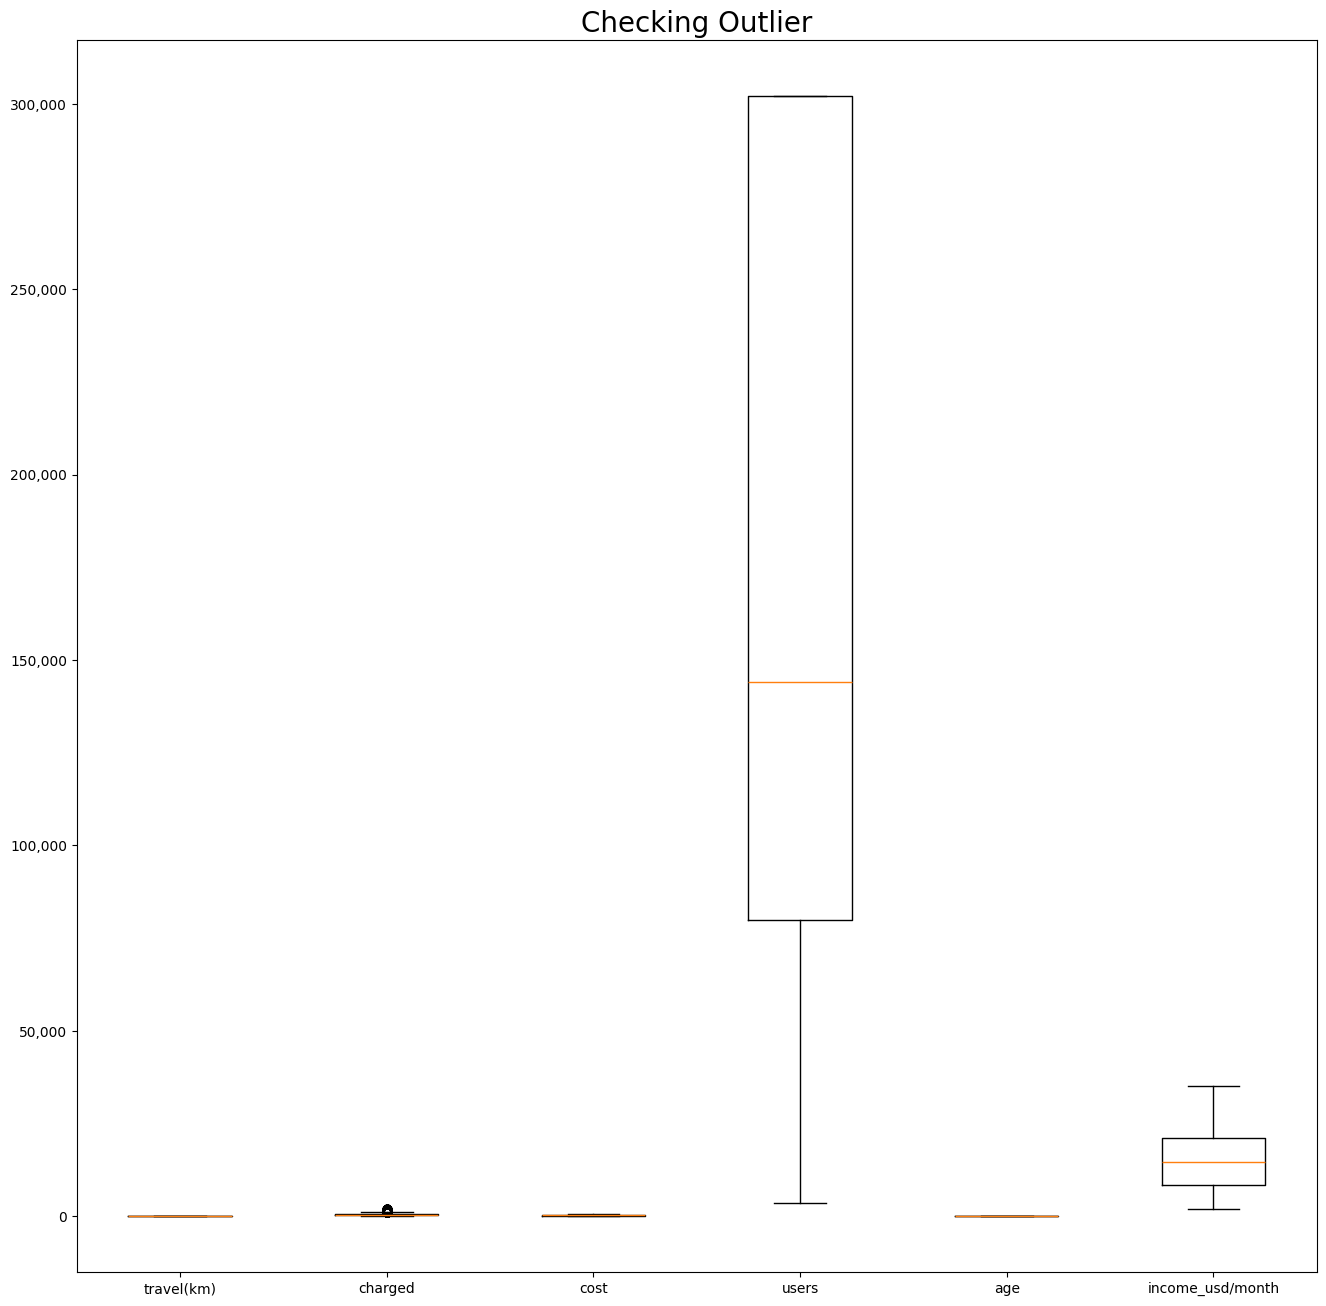

In [663]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Boxplot
multiple_boxplot = fin_df[['travel(km)', 'charged', 'cost', 'users', 'age', 'income_usd/month']]
ax.boxplot(multiple_boxplot)

# theme
ax.set_title('Checking Outlier', fontsize = 20)
ax.set_xticks([1, 2, 3, 4, 5, 6], ['travel(km)', 'charged', 'cost', 'users', 'age', 'income_usd/month'])

# format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\3159915072.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -250.0, '-250'),
 Text(0, 0.0, '0'),
 Text(0, 250.0, '250'),
 Text(0, 500.0, '500'),
 Text(0, 750.0, '750'),
 Text(0, 1000.0, '1,000'),
 Text(0, 1250.0, '1,250'),
 Text(0, 1500.0, '1,500'),
 Text(0, 1750.0, '1,750'),
 Text(0, 2000.0, '2,000'),
 Text(0, 2250.0, '2,250')]

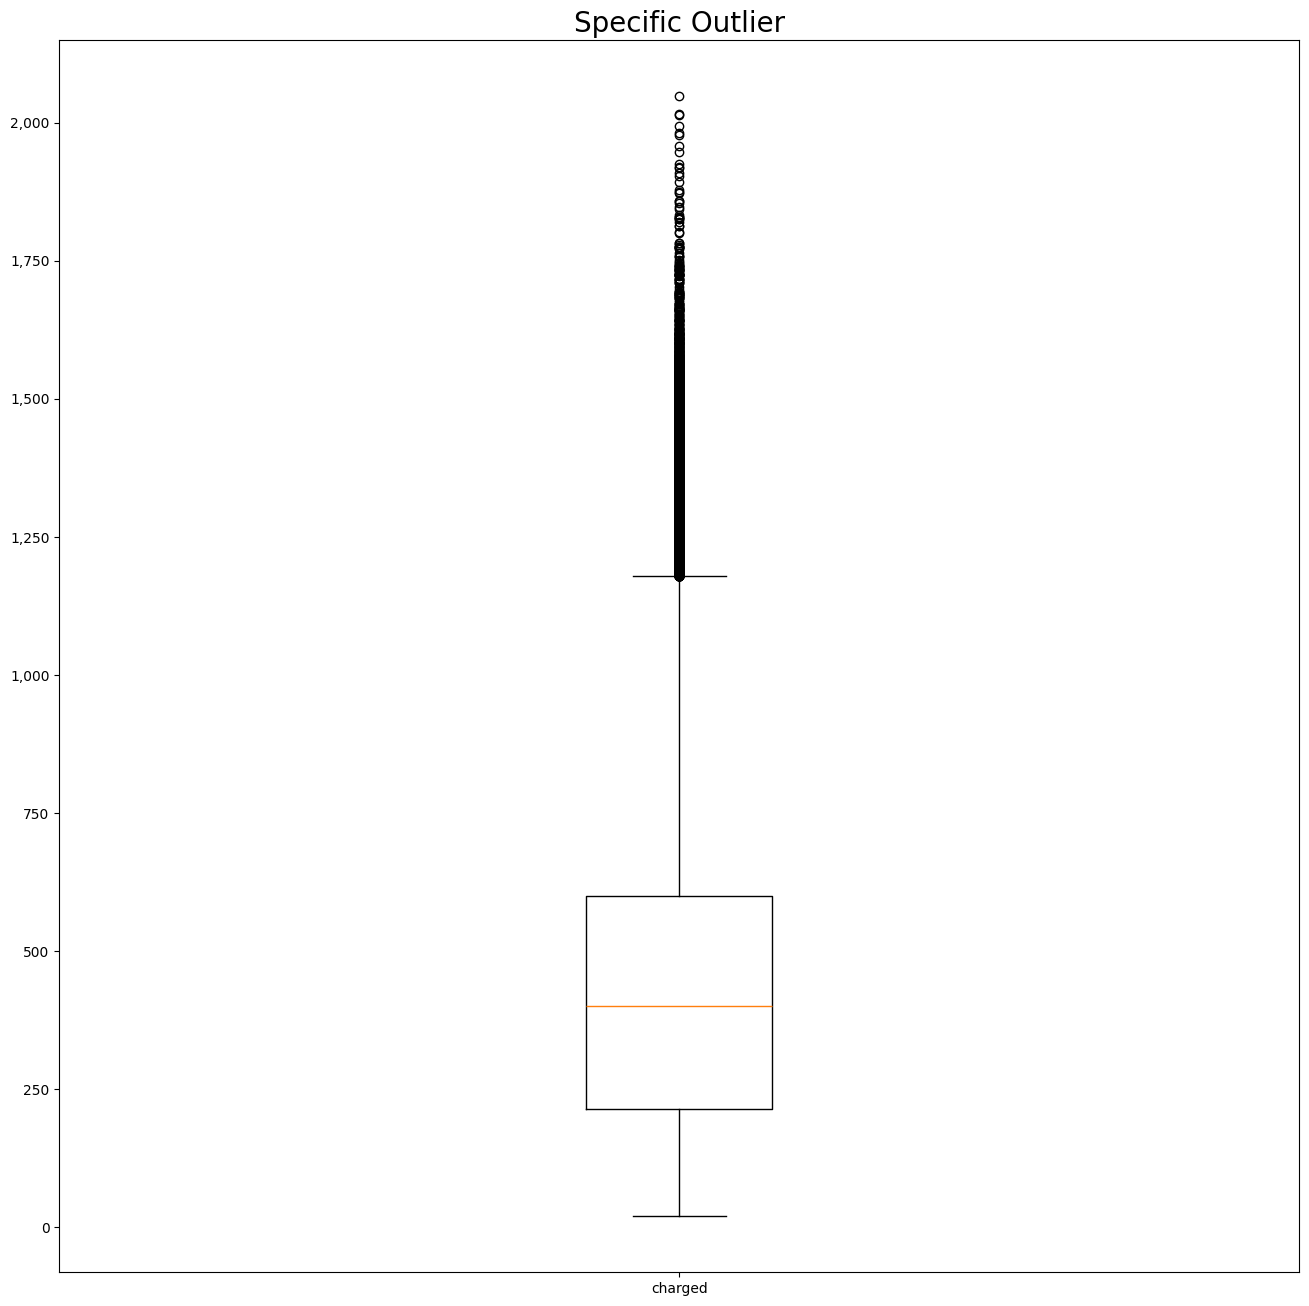

In [664]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Specific Outlier
ax.boxplot(fin_df['charged'])

# theme
ax.set_title('Specific Outlier', fontsize = 20)
ax.set_xticks([1], ['charged'])

# format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

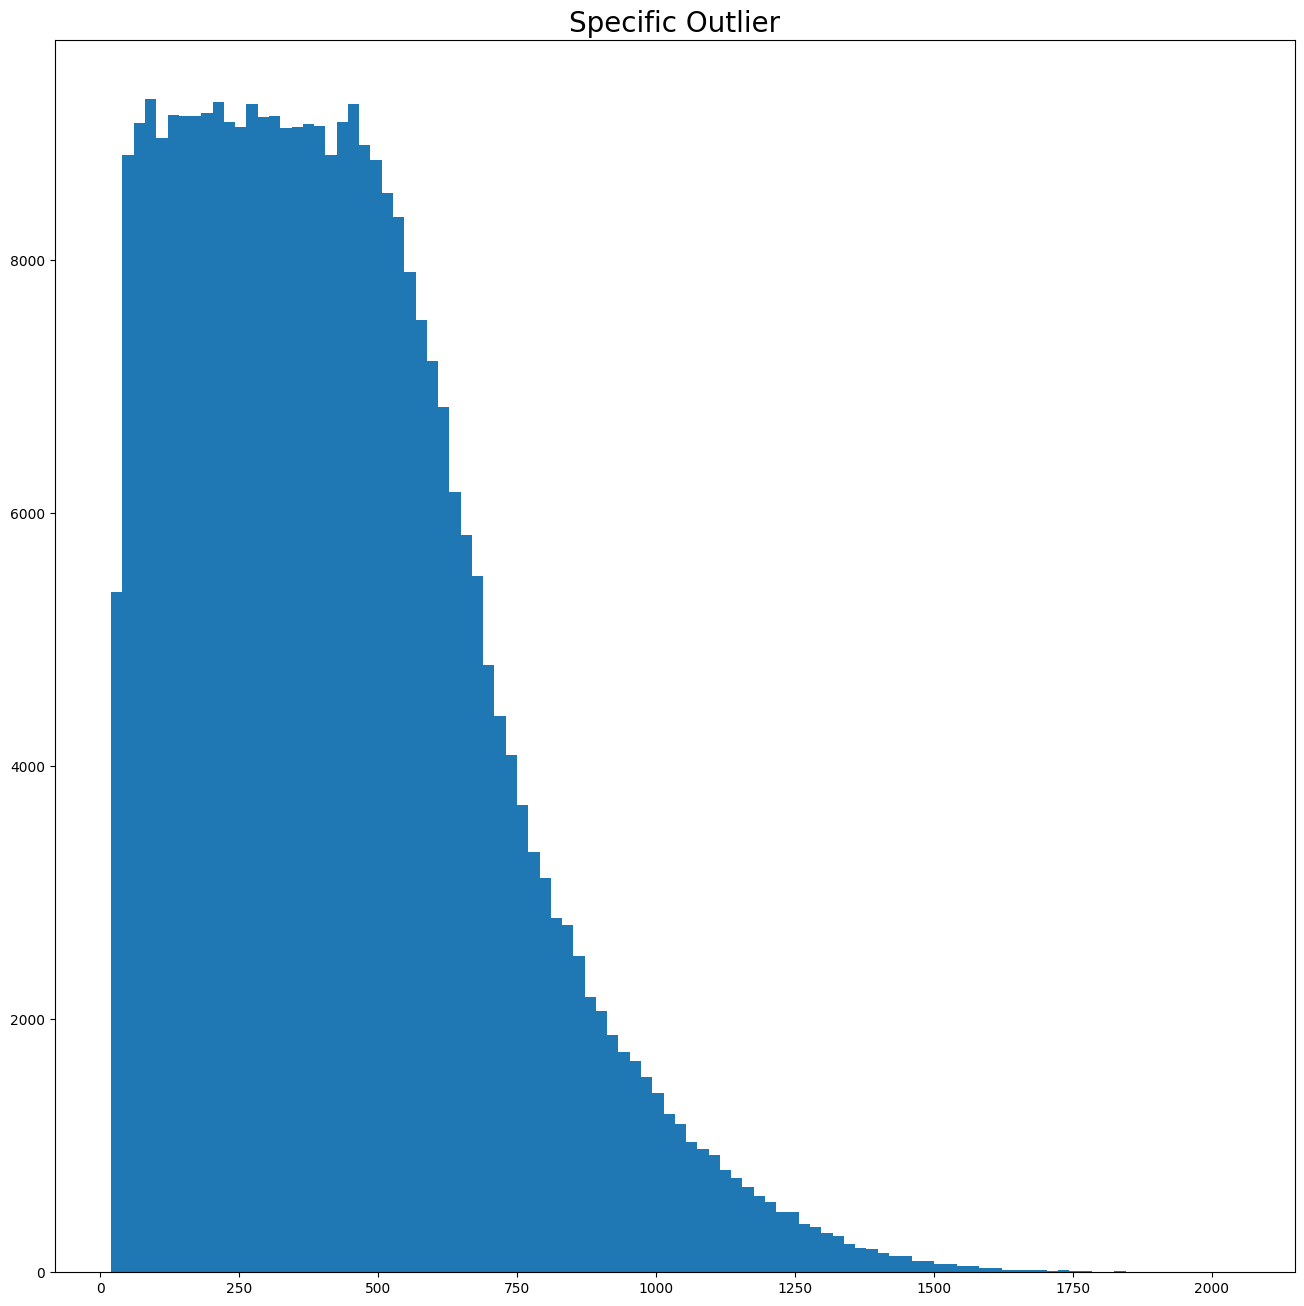

In [665]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Histogram methode
ax.hist(fin_df['charged'], bins = 100)

# theme
ax.set_title('Specific Outlier', fontsize = 20)

plt.show()

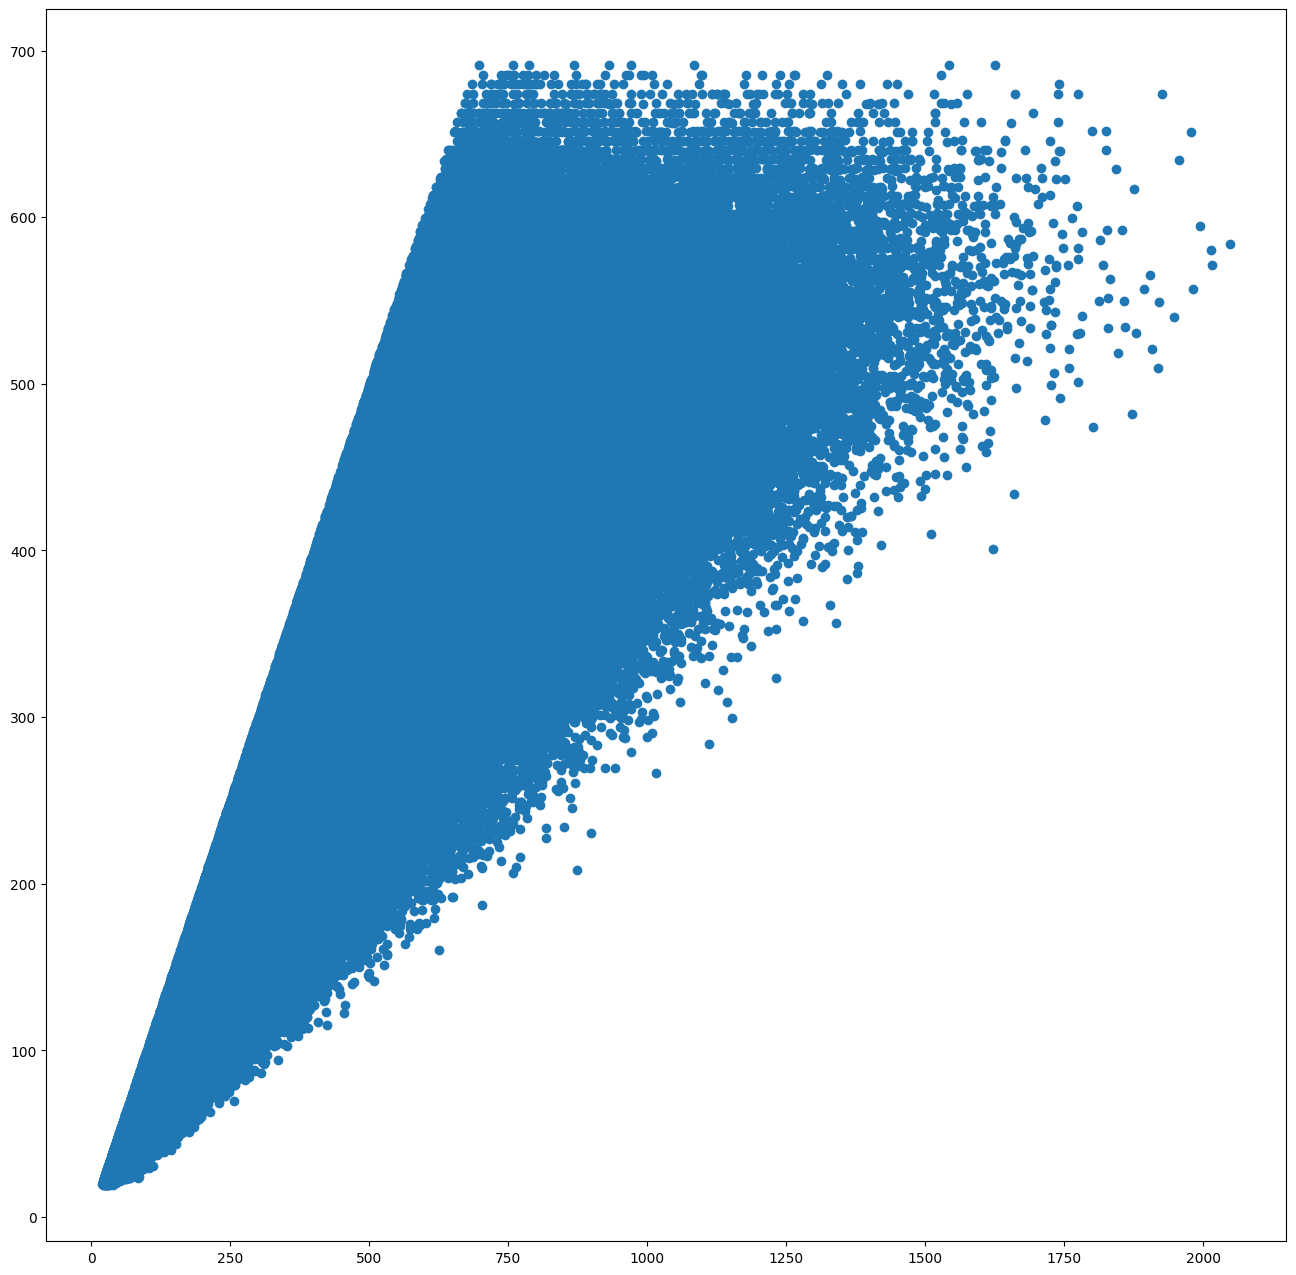

In [666]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Scatterplot methode
ax.scatter(fin_df['charged'], fin_df['cost'])
plt.show()

Z-score methode

A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation



In [667]:
# Check mean and std
mean = np.mean(fin_df['charged'])
std = np.std(fin_df['charged'])

print('mean of the dataset: ', round(mean, 2)) 
print('std. deviation: ', round(std, 2), '\n') 

# Z-score Methode
data = fin_df['charged']
threshold = 3
outlier = [] 

for i in data: 
    z = (i - mean) / std 
    if z > threshold: 
        outlier.append(i) 

# Z-score Outlier
zscore_outlier = pd.DataFrame(outlier)
zscore_outlier.sort_values(by = 0, ascending = True, inplace = True)
zscore_outlier.head()

mean of the dataset:  435.26
std. deviation:  277.85 



,0
2665,1268.83
2708,1268.83
1945,1268.83
1011,1268.91
803,1268.91


In [668]:
# Outlier Data in Dataframe
sampling_outlier = fin_df.loc[fin_df['charged'] >= 1268.83]
sampling_outlier

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,...,payment,gender,age,income_usd/month,holiday,year,month,first_day_month,location_id,core_id
26,8c7af8ea76cfc413c9e59f9b77b43b283a2e840bc04510...,2016-01-02,yellow cab,new york ny,44.08,1469.49,634.75,834.74,8405837,302149,...,card,male,26,8714,no_holiday,2016,1,2016-01-01,2b4e36b47727381c070245580da7da9c115f80dff3832c...,58363dff18bc2b40079dcd97ed5e3392e56ab0620811aa...
162,0cecc40a174dd1130d14d6030d8afd60f74e2e639291b1...,2016-01-03,yellow cab,new york ny,42.40,1325.84,529.15,796.69,8405837,302149,...,card,male,33,6750,no_holiday,2016,1,2016-01-01,d95815b5617ed2d4f002fc39e28463b8d3cb337e4ef9bd...,13048c3e92d52972dcce982a84e7d14bf905f03e5c4bf1...
372,da2c95afb784f9f9c00378c0cb30d691e0e9bad9aca3fb...,2016-01-05,yellow cab,new york ny,36.00,1274.77,475.20,799.57,8405837,302149,...,card,female,48,5382,eastern easter,2016,1,2016-01-01,cd4b4a1e1250c21256abb18f1b2a5360b297bd57e1e704...,02de118ee0c094aa4aade8fd4f650e5e9246df0dcd39ac...
390,a16849dc54664fe64db13b2e79428289813c0b63488489...,2016-01-05,yellow cab,new york ny,33.06,1376.49,460.20,916.29,8405837,302149,...,card,male,37,17993,eastern easter,2016,1,2016-01-01,b9be762be063dd830c53f62d4a347c6707600fbc8bf58b...,673f961d0d34bb305f387c8fadc18fd4030530dd4a01e3...
394,89eb8d3654d420b8c44407870b1ce3a7dcfe3121c2fcaa...,2016-01-05,yellow cab,new york ny,37.62,1459.66,469.50,990.16,8405837,302149,...,card,male,47,9715,eastern easter,2016,1,2016-01-01,c6f317e1693c1942ff410ba4c4fbf700103fa0babb64ba...,b666fe7b537e3757bdc3590617448f8dbf0aa268b5439e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330238,efb22eb1ad850124ed0d534bd23f5290b2ac4b6c2f73ac...,2018-12-22,yellow cab,new york ny,44.07,1327.22,608.17,719.05,8405837,302149,...,card,male,25,19879,no_holiday,2018,12,2018-12-01,85c4ec3424e8c903c298730d30e26306bb9f574da3f37e...,3730427678476cf1b0dd7f43393deec805a2c4830d09db...
330827,42a03158b5bcf70da40d0a97e049720da861a53e34b1c0...,2018-12-22,yellow cab,new york ny,47.60,1280.99,674.02,606.97,8405837,302149,...,cash,male,31,10962,no_holiday,2018,12,2018-12-01,22de0c11bd937753d2e6906b38442cb47102952bf82aa8...,1c1bb90f7ab5bcb77b6952c44f9708499a5f379376f1dc...
330915,bc72acb43e1c7de69aa8779a9297bda9f2c1487fe5ab7d...,2018-12-22,yellow cab,silicon valley,46.40,1293.94,645.89,648.05,1177609,27247,...,card,male,18,16643,no_holiday,2018,12,2018-12-01,a5f15c8a7bfd0b1fb4eb936456217985e54ca2baa5b135...,0c3840987f728b6beb24942a5c8378eb6b32b03021c674...
333096,e60cca429c2cf258016ca776a48de390bbcce19bd3a9ab...,2018-12-28,yellow cab,new york ny,44.85,1294.55,575.87,718.68,8405837,302149,...,card,male,23,22120,no_holiday,2018,12,2018-12-01,048a4e19bf54b5e9ad548025171f89326839572260898b...,032404295a834aca9919648b980749ebccc4dc76d5e32a...


In [669]:
# Inter Quartile Range (IQR) Methode
Q1 = np.percentile(fin_df['charged'], 25, interpolation = 'midpoint')
Q3 = np.percentile(fin_df['charged'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('IQR Score: ', IQR)

old_data = fin_df.shape
old_data_row = fin_df.shape[0]

print('Old Shape: ', old_data)
 
# Upper bound
upper = np.where(fin_df['charged'] >= (Q3 + 1.5 * IQR))
print('Upper Bound: ', Q1)

# Lower bound
lower = np.where(fin_df['charged'] <= (Q1 - 1.5 * IQR))
print('Lower Bound: ', Q3)

IQR Score:  385.72
Old Shape:  (334575, 22)
Upper Bound:  214.42
Lower Bound:  600.14


### Remove Outlier With IQR

In [670]:
# # Remove outlier
# fin_df.drop(upper[0], inplace = True)
# fin_df.drop(lower[0], inplace = True)

# new_data = fin_df.shape
# new_data_row = fin_df.shape[0]

# print('New Shape: ', new_data)

## Correlation

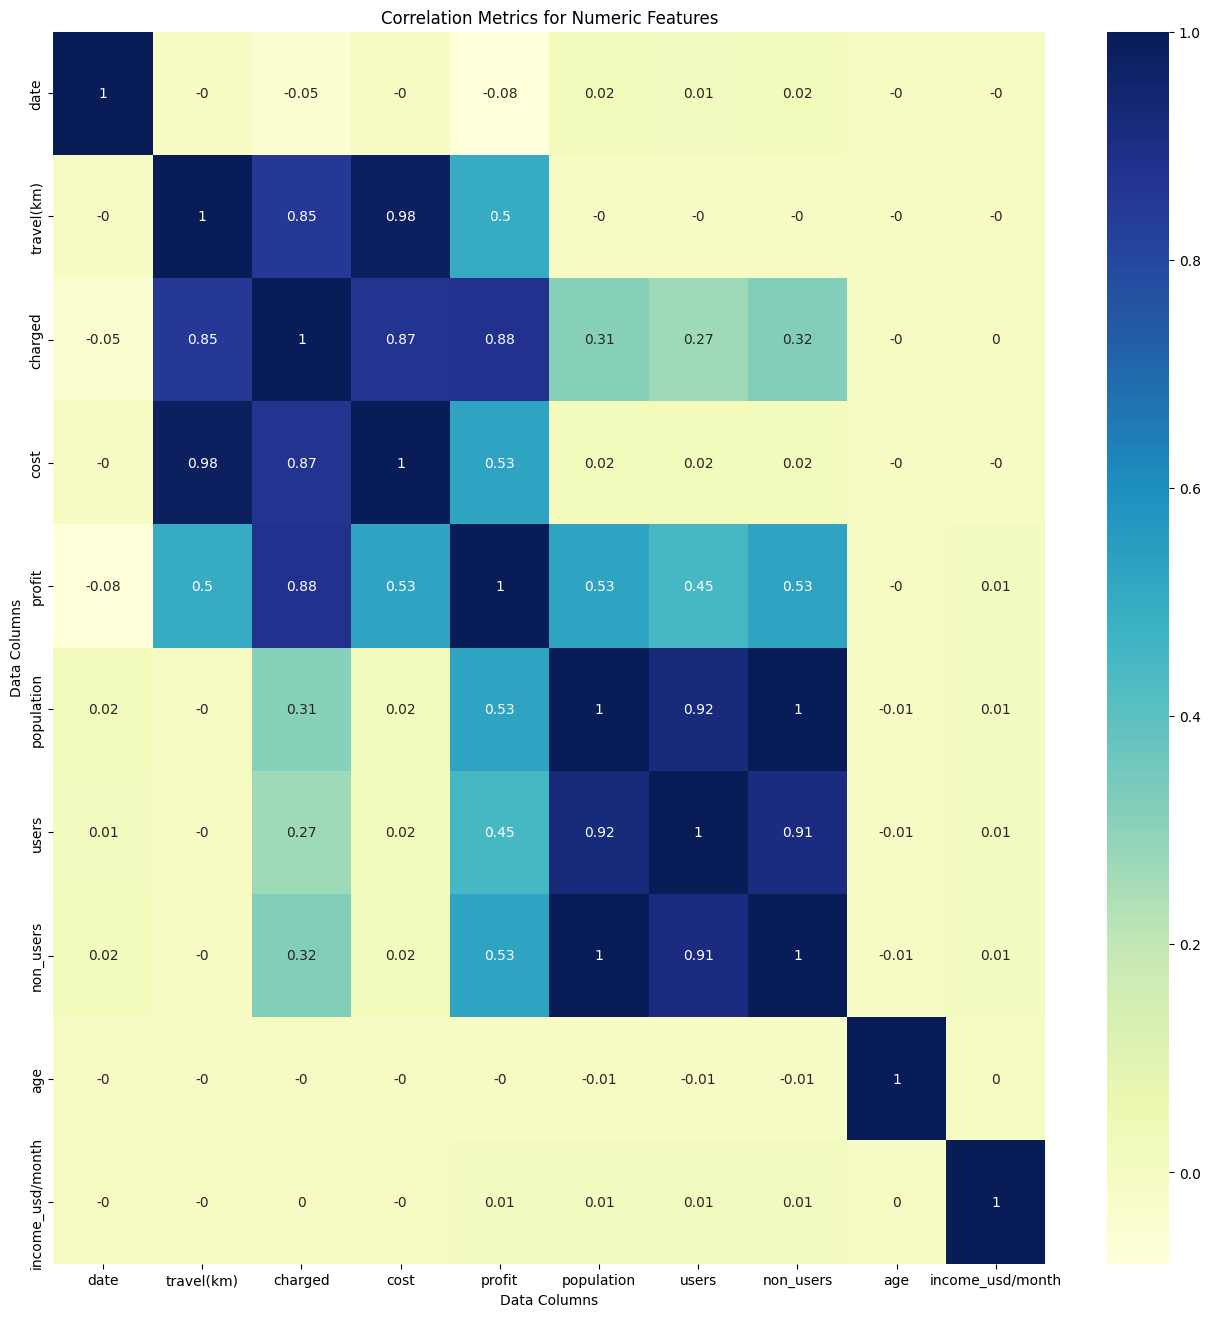

In [671]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Date & Numeric Correlations
correlations_data = fin_df[['date', 'travel(km)', 'charged', 'cost', 'profit', 'population', 'users', 'non_users', 'age', 'income_usd/month']]

# plotting correlation heatmap
sns.heatmap(correlations_data.corr().round(2), cmap = "YlGnBu", annot = True)

plt.title('Correlation Metrics for Numeric Features')
plt.xlabel('Data Columns')
plt.ylabel('Data Columns')

# displaying heatmap
plt.show()

## Descriptive Analyst

In [672]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            334575 non-null  object        
 1   date              334575 non-null  datetime64[ns]
 2   company           334575 non-null  object        
 3   city              334575 non-null  object        
 4   travel(km)        334575 non-null  float64       
 5   charged           334575 non-null  float64       
 6   cost              334575 non-null  float64       
 7   profit            334575 non-null  float64       
 8   population        334575 non-null  int64         
 9   users             334575 non-null  int64         
 10  non_users         334575 non-null  int64         
 11  cust_id           334575 non-null  object        
 12  payment           334575 non-null  object        
 13  gender            334575 non-null  object        
 14  age 

### Profit Section

In [673]:
profit = fin_df['profit'].copy()
profit = profit.describe(include = 'all').round(2)

# profit['mode'] = stats.mode(profit)
profit['variance'] = profit.var().round(2)
profit['Range'] = profit.max() - profit.min()
profit['IQR'] = stats.iqr(profit, rng = (25,75))

profit['Coefficient of Variation'] = stats.variation(profit, axis = 0).round(2)
profit['Skewness'] = stats.skew(profit._get_numeric_data(), nan_policy = 'omit').round(2)
profit['Kurtosis'] = stats.kurtosis(profit._get_numeric_data(), nan_policy = 'omit').round(2)

profit.round(2)

count                       3.345750e+05
mean                        1.488900e+02
std                         1.600400e+02
min                         0.000000e+00
25%                         3.709000e+01
50%                         9.225000e+01
75%                         2.027100e+02
max                         1.463970e+03
variance                    1.396764e+10
Range                       1.396764e+10
IQR                         2.511908e+05
Coefficient of Variation    2.120000e+00
Skewness                    1.790000e+00
Kurtosis                    1.680000e+00
Name: profit, dtype: float64

### Charged Section

In [674]:
charged = fin_df['charged'].copy()
charged = charged.describe(include = 'all').round(2)

# charged['mode'] = stats.mode(charged)
charged['variance'] = charged.var().round(2)
charged['Range'] = charged.max() - profit.min()
charged['IQR'] = stats.iqr(charged, rng = (25,75))

charged['Coefficient of Variation'] = stats.variation(charged, axis = 0).round(2)
charged['Skewness'] = stats.skew(charged._get_numeric_data(), nan_policy = 'omit').round(2)
charged['Kurtosis'] = stats.kurtosis(charged._get_numeric_data(), nan_policy = 'omit').round(2)

charged.round(2)

count                       3.345750e+05
mean                        4.352600e+02
std                         2.778500e+02
min                         1.983000e+01
25%                         2.144200e+02
50%                         4.007400e+02
75%                         6.001400e+02
max                         2.048030e+03
variance                    1.394524e+10
Range                       1.394524e+10
IQR                         2.511347e+05
Coefficient of Variation    2.120000e+00
Skewness                    1.790000e+00
Kurtosis                    1.680000e+00
Name: charged, dtype: float64

### Cost Section

In [675]:
cost = fin_df['cost'].copy()
cost = cost.describe(include = 'all').round(2)

# cost['mode'] = stats.mode(cost)
cost['variance'] = cost.var().round(2)
cost['Range'] = cost.max() - profit.min()
cost['IQR'] = stats.iqr(cost, rng = (25,75))

cost['Coefficient of Variation'] = stats.variation(cost, axis = 0).round(2)
cost['Skewness'] = stats.skew(cost._get_numeric_data(), nan_policy = 'omit').round(2)
cost['Kurtosis'] = stats.kurtosis(cost._get_numeric_data(), nan_policy = 'omit').round(2)

cost.round(2)

count                       3.345750e+05
mean                        2.863700e+02
std                         1.579800e+02
min                         1.900000e+01
25%                         1.513200e+02
50%                         2.827400e+02
75%                         4.139500e+02
max                         6.912000e+02
variance                    1.396868e+10
Range                       1.396868e+10
IQR                         2.509149e+05
Coefficient of Variation    2.120000e+00
Skewness                    1.790000e+00
Kurtosis                    1.680000e+00
Name: cost, dtype: float64

### Travel Section

In [676]:
travel = fin_df['travel(km)'].copy()
travel = travel.describe(include = 'all').round(2)

# travel['mode'] = stats.mode(travel)
travel['variance'] = travel.var().round(2)
travel['Range'] = travel.max() - profit.min()
travel['IQR'] = stats.iqr(travel, rng = (25,75))

travel['Coefficient of Variation'] = stats.variation(travel, axis = 0).round(2)
travel['Skewness'] = stats.skew(travel._get_numeric_data(), nan_policy = 'omit').round(2)
travel['Kurtosis'] = stats.kurtosis(travel._get_numeric_data(), nan_policy = 'omit').round(2)

travel.round(2)

count                       3.345750e+05
mean                        2.257000e+01
std                         1.223000e+01
min                         1.900000e+00
25%                         1.200000e+01
50%                         2.247000e+01
75%                         3.296000e+01
max                         4.800000e+01
variance                    1.399074e+10
Range                       1.399074e+10
IQR                         2.509285e+05
Coefficient of Variation    2.120000e+00
Skewness                    1.790000e+00
Kurtosis                    1.680000e+00
Name: travel(km), dtype: float64

## Problem Statement

In [677]:
fin_df.head()

,trx_id,date,company,city,travel(km),charged,cost,profit,population,users,...,payment,gender,age,income_usd/month,holiday,year,month,first_day_month,location_id,core_id
0,df4a76c93a13d3bc4113bb0159a5b2a88964d0f1e03a1a...,2016-01-02,pink cab,chicago il,23.69,343.62,255.85,87.77,1955130,164468,...,card,male,30,21922,no_holiday,2016,1,2016-01-01,183fe7eb7bc9eeeb416bd441a3c10a00d567c6d72c32b9...,fe7e6b849de330a991a822a206e0f7f0117e40de962d60...
1,361bd3e8abcdcdc0895b58c899d21b2014c49763b1ab8d...,2016-01-02,yellow cab,new york ny,24.15,702.62,292.70,409.92,8405837,302149,...,card,male,28,17517,no_holiday,2016,1,2016-01-01,821cf60d78e0090dddf35ceffeac7c088c70c3216b6c69...,16d6d6f8ed81a81a971cbc5f5dbee49db42fad5c4869ff...
2,8f74cd6debaafefc9078e9f07e64eb195251777081bcec...,2016-01-02,yellow cab,chicago il,44.40,701.62,628.70,72.92,1955130,164468,...,card,male,26,15275,no_holiday,2016,1,2016-01-01,aeae1e485c7c8dc1739669bf3c011c26002e1197fbc36a...,59bc11f0129a1c2349c325c88e112183eb7c66ec73d107...
3,39839352eccf6a28dde0ccfacec98400a5ed76a1956be7...,2016-01-02,yellow cab,new york ny,33.33,1090.92,431.96,658.96,8405837,302149,...,cash,male,38,22427,no_holiday,2016,1,2016-01-01,bb83dda60dcb4f591d3e052036ce5e6c05d26c34da615b...,a68aea63c90ccc81dd94d5d926eb1b502cab6e6904dab4...
4,3f16ff5cd8aeee746607270c0683725bc8474fc54f1f41...,2016-01-02,yellow cab,atlanta ga,40.46,729.47,553.49,175.98,814885,24701,...,cash,male,36,19753,no_holiday,2016,1,2016-01-01,ddb7c8c6a85fb8a806a0e0cd968578a6fe2ea5c826f6a0...,4ec255cbb41117b4d4079b1b617c215cd7b8d3c102b634...


In [678]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            334575 non-null  object        
 1   date              334575 non-null  datetime64[ns]
 2   company           334575 non-null  object        
 3   city              334575 non-null  object        
 4   travel(km)        334575 non-null  float64       
 5   charged           334575 non-null  float64       
 6   cost              334575 non-null  float64       
 7   profit            334575 non-null  float64       
 8   population        334575 non-null  int64         
 9   users             334575 non-null  int64         
 10  non_users         334575 non-null  int64         
 11  cust_id           334575 non-null  object        
 12  payment           334575 non-null  object        
 13  gender            334575 non-null  object        
 14  age 

### How the finance condition in each company?

#### Annual Report

In [679]:
# Group
finance = fin_df.copy()
finance = finance.round(0)

company = finance.groupby(by = ['company', 'first_day_month']).agg({'profit': 'sum', 'trx_id': 'count'})
company = pd.DataFrame(company)
company.reset_index(inplace = True)
company['quarter'] = pd.PeriodIndex(company['first_day_month'], freq='Q')
company['quarter'] = company['quarter'].astype(str)
company

,company,first_day_month,profit,trx_id,quarter
0,pink cab,2016-01-01,88025.0,1086,2016Q1
1,pink cab,2016-02-01,117627.0,1307,2016Q1
2,pink cab,2016-03-01,141036.0,1518,2016Q1
3,pink cab,2016-04-01,104997.0,1361,2016Q2
4,pink cab,2016-05-01,98924.0,1436,2016Q2
...,...,...,...,...,...
67,yellow cab,2018-08-01,1018114.0,7548,2018Q3
68,yellow cab,2018-09-01,1298386.0,8663,2018Q3
69,yellow cab,2018-10-01,1293513.0,8842,2018Q4
70,yellow cab,2018-11-01,1121092.0,8401,2018Q4


In [680]:
# pink company
pink_comp = company.copy()
pink_comp = pink_comp.round(0)
pink_comp = pink_comp.loc[pink_comp['company'] == 'pink cab']
pink_comp.head()

,company,first_day_month,profit,trx_id,quarter
0,pink cab,2016-01-01,88025.0,1086,2016Q1
1,pink cab,2016-02-01,117627.0,1307,2016Q1
2,pink cab,2016-03-01,141036.0,1518,2016Q1
3,pink cab,2016-04-01,104997.0,1361,2016Q2
4,pink cab,2016-05-01,98924.0,1436,2016Q2


In [681]:
# yellow company
yellow_comp = company.copy()
yellow_comp = yellow_comp.round(0)
yellow_comp = yellow_comp.loc[yellow_comp['company'] == 'yellow cab']
yellow_comp.head()

,company,first_day_month,profit,trx_id,quarter
36,yellow cab,2016-01-01,918563.0,4688,2016Q1
37,yellow cab,2016-02-01,1082484.0,5458,2016Q1
38,yellow cab,2016-03-01,1041700.0,5740,2016Q1
39,yellow cab,2016-04-01,1003917.0,5578,2016Q2
40,yellow cab,2016-05-01,1247424.0,6173,2016Q2


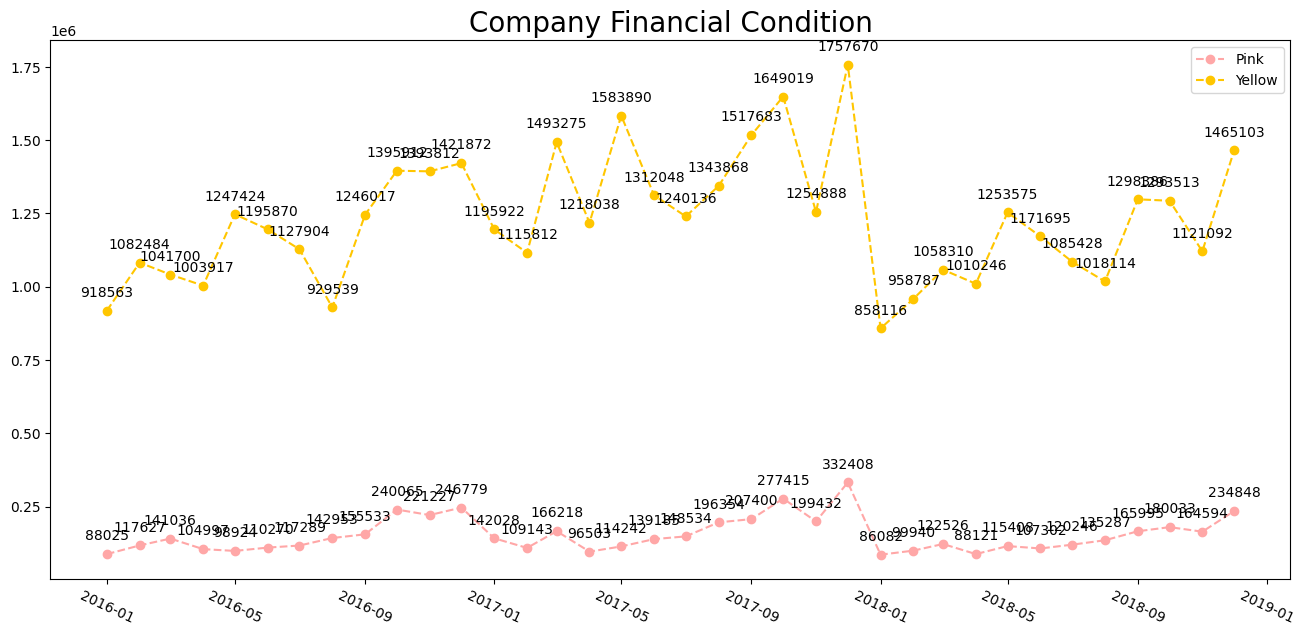

In [682]:
# create a canvas
plt.figure(figsize = (16, 7))
# plt.suptitle('Company Financial Condition')
plt.title('Company Financial Condition', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# data
pink_date = pink_comp['first_day_month']
pink_profit = pink_comp['profit']

yellow_date = yellow_comp['first_day_month']
yellow_profit = yellow_comp['profit']

# pink
plt.subplot(1, 1, 1)
plt.plot(pink_date, pink_profit, label = 'Pink', color = '#ffa7a7', marker = "o", ls = "--")

# zip joins x and y coordinates in pairs
for pink_date, pink_profit in zip(pink_date, pink_profit):
    label = "{:.0f}".format(pink_profit)
    plt.annotate(label, # this is the text
                 (pink_date, pink_profit), # these are the coordinates to position the label
                 textcoords = 'offset points', # how to position the text
                 xytext = (0,10), # distance from text to points (x,y)
                 ha = 'center') # horizontal alignment can be left, right or center
    
# plt.title('Pink Company')
plt.xticks(rotation = -25)
plt.legend()

# yellow
plt.subplot(1, 1, 1)
plt.plot(yellow_date, yellow_profit, label = 'Yellow', color = '#ffc600', marker = "o", ls = "--")

# zip joins x and y coordinates in pairs
for yellow_date, yellow_profit in zip(yellow_date, yellow_profit):
    label = "{:.0f}".format(yellow_profit)
    plt.annotate(label, # this is the text
                 (yellow_date, yellow_profit), # these are the coordinates to position the label
                 textcoords = 'offset points', # how to position the text
                 xytext = (0,10), # distance from text to points (x,y)
                 ha = 'center') # horizontal alignment can be left, right or center

# plt.title('Yellow Company')
plt.xticks(rotation = -25)
plt.legend()

plt.show()

#### Profit Report

In [683]:
company.head()

,company,first_day_month,profit,trx_id,quarter
0,pink cab,2016-01-01,88025.0,1086,2016Q1
1,pink cab,2016-02-01,117627.0,1307,2016Q1
2,pink cab,2016-03-01,141036.0,1518,2016Q1
3,pink cab,2016-04-01,104997.0,1361,2016Q2
4,pink cab,2016-05-01,98924.0,1436,2016Q2


In [684]:
# Group
detailed_profit = company.copy()
detailed_profit = detailed_profit.round(0)

detailed_profit = detailed_profit.groupby(by = ['company']).agg({'profit': 'sum', 'trx_id': 'sum'})
detailed_profit = pd.DataFrame(detailed_profit)
detailed_profit.reset_index(inplace = True)
detailed_profit

,company,profit,trx_id
0,pink cab,5533969.0,73583
1,yellow cab,44279628.0,260992


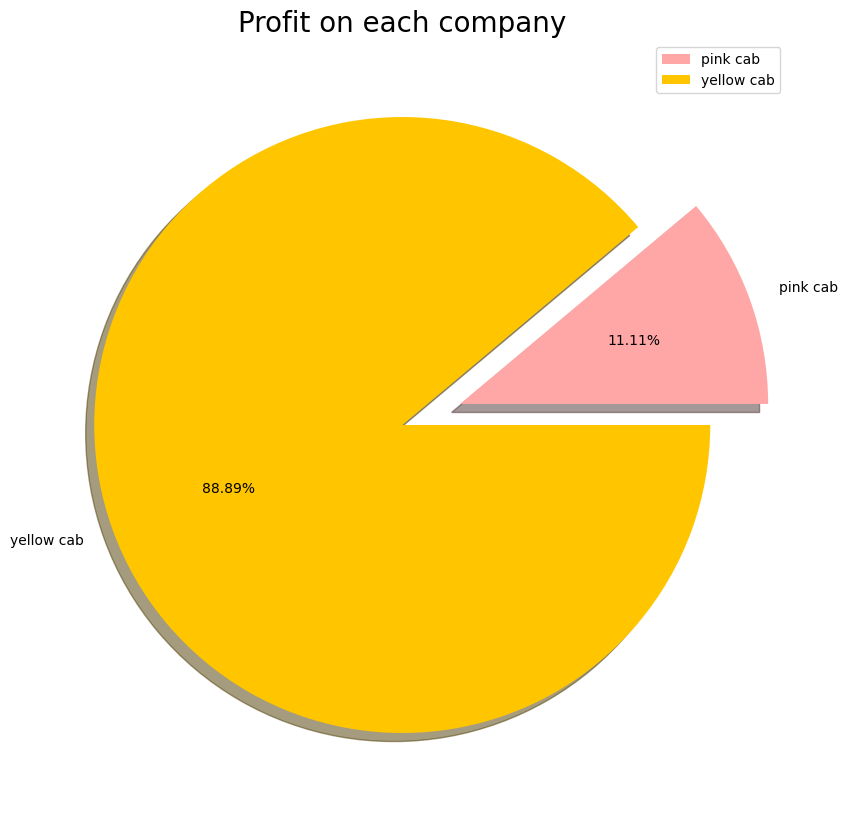

In [685]:
# create a canvas
plt.figure(figsize = (16, 10))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# parameter
category = detailed_profit['company']
value = detailed_profit['profit']

# style
slice = [0.2, 0]
palette = ['#ffa7a7', '#ffc600']

plt.pie(value, labels = category, autopct='%.2f%%', colors = palette, explode = slice, shadow = True)
plt.title('Profit on each company', fontsize = 20)
plt.legend()
plt.show()

#### Transaction Order Report

In [686]:
company.head()

,company,first_day_month,profit,trx_id,quarter
0,pink cab,2016-01-01,88025.0,1086,2016Q1
1,pink cab,2016-02-01,117627.0,1307,2016Q1
2,pink cab,2016-03-01,141036.0,1518,2016Q1
3,pink cab,2016-04-01,104997.0,1361,2016Q2
4,pink cab,2016-05-01,98924.0,1436,2016Q2


In [687]:
# Group
detailed_order = company.copy()
detailed_order = detailed_order.round(0)

detailed_order = detailed_order.groupby(by = ['company', 'quarter']).agg({'profit': 'sum', 'trx_id': 'sum'})
detailed_order = pd.DataFrame(detailed_order)
detailed_order.reset_index(inplace = True)
detailed_order.head()

,company,quarter,profit,trx_id
0,pink cab,2016Q1,346688.0,3911
1,pink cab,2016Q2,314191.0,4301
2,pink cab,2016Q3,415775.0,5778
3,pink cab,2016Q4,708071.0,7849
4,pink cab,2017Q1,417389.0,4811


In [688]:
# pink company
pink_order = detailed_order.copy()
pink_order = pink_order.round(0)
pink_order = pink_order.loc[pink_order['company'] == 'pink cab']
pink_order.head()

,company,quarter,profit,trx_id
0,pink cab,2016Q1,346688.0,3911
1,pink cab,2016Q2,314191.0,4301
2,pink cab,2016Q3,415775.0,5778
3,pink cab,2016Q4,708071.0,7849
4,pink cab,2017Q1,417389.0,4811


In [689]:
# yellow company
yellow_order = detailed_order.copy()
yellow_order = yellow_order.round(0)
yellow_order = yellow_order.loc[yellow_order['company'] == 'yellow cab']
yellow_order.head()

,company,quarter,profit,trx_id
12,yellow cab,2016Q1,3042747.0,15886
13,yellow cab,2016Q2,3447211.0,17642
14,yellow cab,2016Q3,3303460.0,19610
15,yellow cab,2016Q4,4211596.0,25216
16,yellow cab,2017Q1,3805009.0,19438


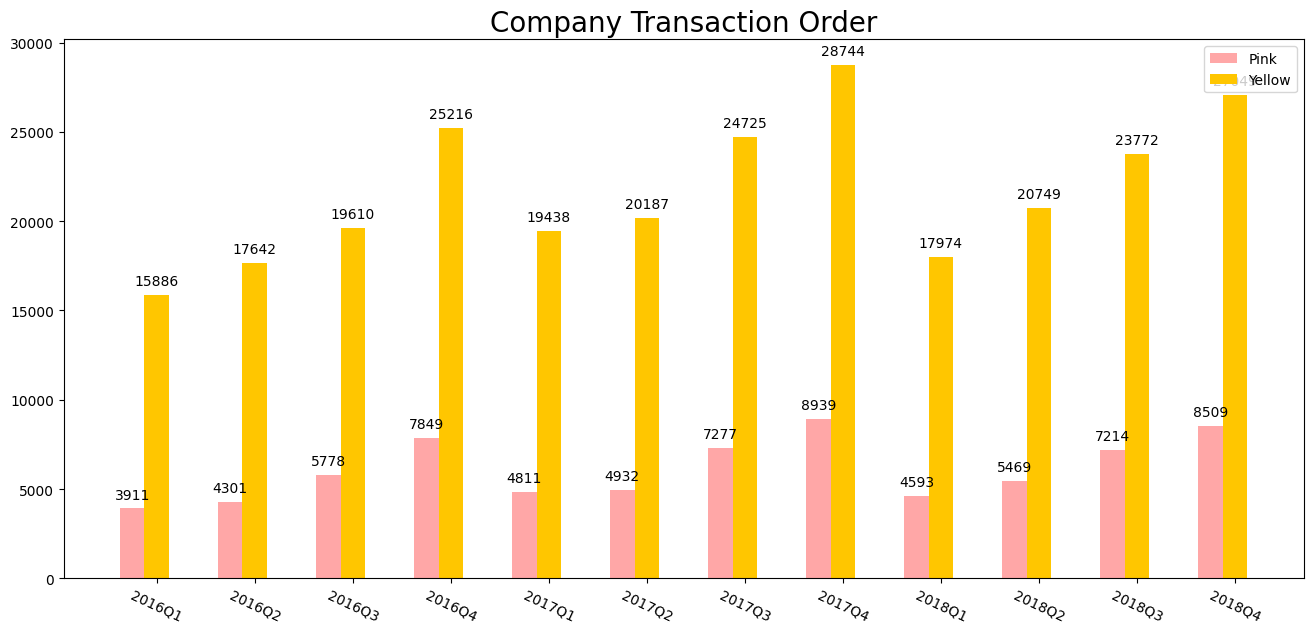

In [690]:
# create a canvas
plt.figure(figsize = (16, 7))
# plt.suptitle('Company Financial Condition')
plt.title('Company Transaction Order', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# 
pink_quantile = pink_order['quarter']
pink_trx = pink_order['trx_id']

# 
yellow_quantile = yellow_order['quarter']
yellow_trx = yellow_order['trx_id']

# style
multiple_pink = np.arange(len(pink_quantile))
multiple_yellow = np.arange(len(yellow_quantile))
my_width = 0.25

# 
pink = plt.bar(multiple_pink, pink_trx, width = my_width, label = 'Pink', color = '#ffa7a7')
yellow = plt.bar(multiple_yellow + my_width, yellow_trx, width = my_width, label = 'Yellow', color = '#ffc600')

plt.bar_label(pink, labels = pink_trx, label_type = 'edge', padding = 5)
plt.bar_label(yellow, labels = yellow_trx, label_type = 'edge', padding = 5)

# 
plt.xticks(multiple_yellow + my_width, pink_quantile, rotation = -25)

plt.legend()
plt.show()

### How customers behave towards each company?

#### Profit by Gender

In [691]:
# Group
behave = fin_df.copy()
behave = behave.round(0)

gender = behave.groupby(by = ['company', 'first_day_month', 'gender']).agg({'profit': 'sum', 'trx_id': 'count'})
gender = pd.DataFrame(gender)
gender.reset_index(inplace = True)
gender['quarter'] = pd.PeriodIndex(gender['first_day_month'], freq='Q')
gender['quarter'] = gender['quarter'].astype(str)
gender.head()

,company,first_day_month,gender,profit,trx_id,quarter
0,pink cab,2016-01-01,female,28990.0,328,2016Q1
1,pink cab,2016-01-01,male,59035.0,758,2016Q1
2,pink cab,2016-02-01,female,50887.0,586,2016Q1
3,pink cab,2016-02-01,male,66740.0,721,2016Q1
4,pink cab,2016-03-01,female,54664.0,643,2016Q1


In [692]:
# pink company
pink_behave = gender.copy()
pink_behave = pink_behave.round(0)
pink_behave = pink_behave.loc[pink_behave['company'] == 'pink cab']
pink_behave.head()

,company,first_day_month,gender,profit,trx_id,quarter
0,pink cab,2016-01-01,female,28990.0,328,2016Q1
1,pink cab,2016-01-01,male,59035.0,758,2016Q1
2,pink cab,2016-02-01,female,50887.0,586,2016Q1
3,pink cab,2016-02-01,male,66740.0,721,2016Q1
4,pink cab,2016-03-01,female,54664.0,643,2016Q1


In [693]:
# pink gender
pink_gender = pink_behave.copy()
pink_gender = pink_gender.round(0)

pink_gender = pink_gender.groupby(by = ['gender']).agg({'profit': 'sum', 'trx_id': 'sum'})
pink_gender = pd.DataFrame(pink_gender)
pink_gender.reset_index(inplace = True)
pink_gender

,gender,profit,trx_id
0,female,2433087.0,32446
1,male,3100882.0,41137


In [694]:
# yellow company
yellow_behave = gender.copy()
yellow_behave = yellow_behave.round(0)
yellow_behave = yellow_behave.loc[yellow_behave['company'] == 'yellow cab']
yellow_behave.head()

,company,first_day_month,gender,profit,trx_id,quarter
72,yellow cab,2016-01-01,female,256559.0,1388,2016Q1
73,yellow cab,2016-01-01,male,662004.0,3300,2016Q1
74,yellow cab,2016-02-01,female,445522.0,2263,2016Q1
75,yellow cab,2016-02-01,male,636962.0,3195,2016Q1
76,yellow cab,2016-03-01,female,418622.0,2409,2016Q1


In [695]:
# yellow gender
yellow_gender = yellow_behave.copy()
yellow_gender = yellow_gender.round(0)

yellow_gender = yellow_gender.groupby(by = ['gender']).agg({'profit': 'sum', 'trx_id': 'sum'})
yellow_gender = pd.DataFrame(yellow_gender)
yellow_gender.reset_index(inplace = True)
yellow_gender

,gender,profit,trx_id
0,female,18242635.0,110115
1,male,26036993.0,150877


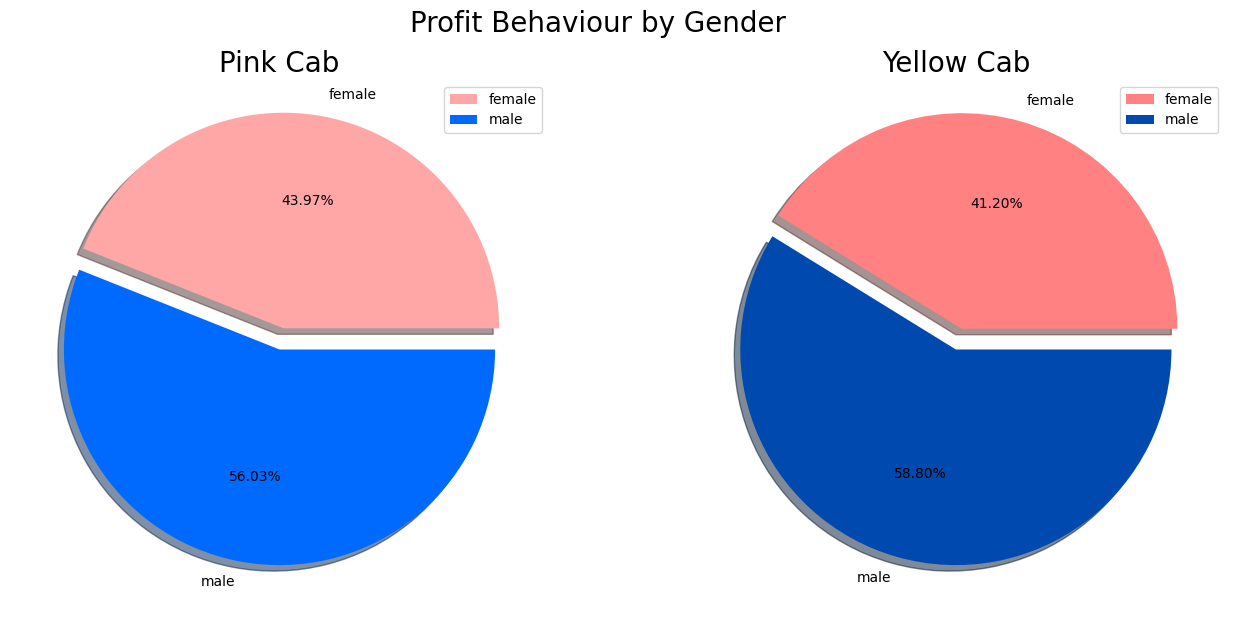

In [696]:
# create canvas
plt.figure(figsize = (16, 7))
plt.suptitle('Profit Behaviour by Gender', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# parameter
category = pink_gender['gender']
value = pink_gender['profit']

# style
slice = [0.1, 0]
pink_palette = ['#ffa7a7', '#006aff']

plt.subplot(1, 2, 1)
plt.pie(value, labels = category, autopct='%.2f%%', explode = slice, colors = pink_palette, shadow = True)
plt.title('Pink Cab', fontsize = 20)
plt.legend()

# parameter
category = yellow_gender['gender']
value = yellow_gender['profit']

yellow_palette = ['#ff8181', '#0049af']

plt.subplot(1, 2, 2)
plt.pie(value, labels = category, autopct='%.2f%%', colors = yellow_palette, explode = slice, shadow = True)
plt.title('Yellow Cab', fontsize = 20)
plt.legend()

plt.show()

#### Transaction by Gender

In [697]:
gender.head()

,company,first_day_month,gender,profit,trx_id,quarter
0,pink cab,2016-01-01,female,28990.0,328,2016Q1
1,pink cab,2016-01-01,male,59035.0,758,2016Q1
2,pink cab,2016-02-01,female,50887.0,586,2016Q1
3,pink cab,2016-02-01,male,66740.0,721,2016Q1
4,pink cab,2016-03-01,female,54664.0,643,2016Q1


In [698]:
# Group
gender_order = gender.copy()
gender_order = gender_order.round(0)

gender_order = gender_order.groupby(by = ['company', 'gender', 'quarter']).agg({'profit': 'sum', 'trx_id': 'sum'})
gender_order = pd.DataFrame(gender_order)
gender_order.reset_index(inplace = True)
gender_order.head()

,company,gender,quarter,profit,trx_id
0,pink cab,female,2016Q1,134541.0,1557
1,pink cab,female,2016Q2,139979.0,1895
2,pink cab,female,2016Q3,184804.0,2555
3,pink cab,female,2016Q4,306818.0,3477
4,pink cab,female,2017Q1,190933.0,2181


In [699]:
# pink company
pink_gender_order = gender_order.copy()
pink_gender_order = pink_gender_order.round(0)
pink_gender_order = pink_gender_order.loc[pink_gender_order['company'] == 'pink cab']
pink_gender_order.head()

,company,gender,quarter,profit,trx_id
0,pink cab,female,2016Q1,134541.0,1557
1,pink cab,female,2016Q2,139979.0,1895
2,pink cab,female,2016Q3,184804.0,2555
3,pink cab,female,2016Q4,306818.0,3477
4,pink cab,female,2017Q1,190933.0,2181


In [700]:
# yellow company
yellow_gender_order = gender_order.copy()
yellow_gender_order = yellow_gender_order.round(0)
yellow_gender_order = yellow_gender_order.loc[yellow_gender_order['company'] == 'yellow cab']
yellow_gender_order.head()

,company,gender,quarter,profit,trx_id
24,yellow cab,female,2016Q1,1120703.0,6060
25,yellow cab,female,2016Q2,1436195.0,7484
26,yellow cab,female,2016Q3,1317815.0,8085
27,yellow cab,female,2016Q4,1740685.0,10558
28,yellow cab,female,2017Q1,1612804.0,8375


In [701]:
# pink female
pink_female = pink_gender_order.copy()
pink_female = pink_female.round(0)
pink_female = pink_female.loc[pink_female['gender'] == 'female']
pink_female.head()

,company,gender,quarter,profit,trx_id
0,pink cab,female,2016Q1,134541.0,1557
1,pink cab,female,2016Q2,139979.0,1895
2,pink cab,female,2016Q3,184804.0,2555
3,pink cab,female,2016Q4,306818.0,3477
4,pink cab,female,2017Q1,190933.0,2181


In [702]:
# yellow female
yellow_female = yellow_gender_order.copy()
yellow_female = yellow_female.round(0)
yellow_female = yellow_female.loc[yellow_female['gender'] == 'female']
yellow_female.head()

,company,gender,quarter,profit,trx_id
24,yellow cab,female,2016Q1,1120703.0,6060
25,yellow cab,female,2016Q2,1436195.0,7484
26,yellow cab,female,2016Q3,1317815.0,8085
27,yellow cab,female,2016Q4,1740685.0,10558
28,yellow cab,female,2017Q1,1612804.0,8375


In [703]:
# pink male
pink_male = pink_gender_order.copy()
pink_male = pink_male.round(0)
pink_male = pink_male.loc[pink_male['gender'] == 'male']
pink_male.head()

,company,gender,quarter,profit,trx_id
12,pink cab,male,2016Q1,212147.0,2354
13,pink cab,male,2016Q2,174212.0,2406
14,pink cab,male,2016Q3,230971.0,3223
15,pink cab,male,2016Q4,401253.0,4372
16,pink cab,male,2017Q1,226456.0,2630


In [704]:
# yellow male
yellow_male = yellow_gender_order.copy()
yellow_male = yellow_male.round(0)
yellow_male = yellow_male.loc[yellow_male['gender'] == 'male']
yellow_male.head()

,company,gender,quarter,profit,trx_id
36,yellow cab,male,2016Q1,1922044.0,9826
37,yellow cab,male,2016Q2,2011016.0,10158
38,yellow cab,male,2016Q3,1985645.0,11525
39,yellow cab,male,2016Q4,2470911.0,14658
40,yellow cab,male,2017Q1,2192205.0,11063


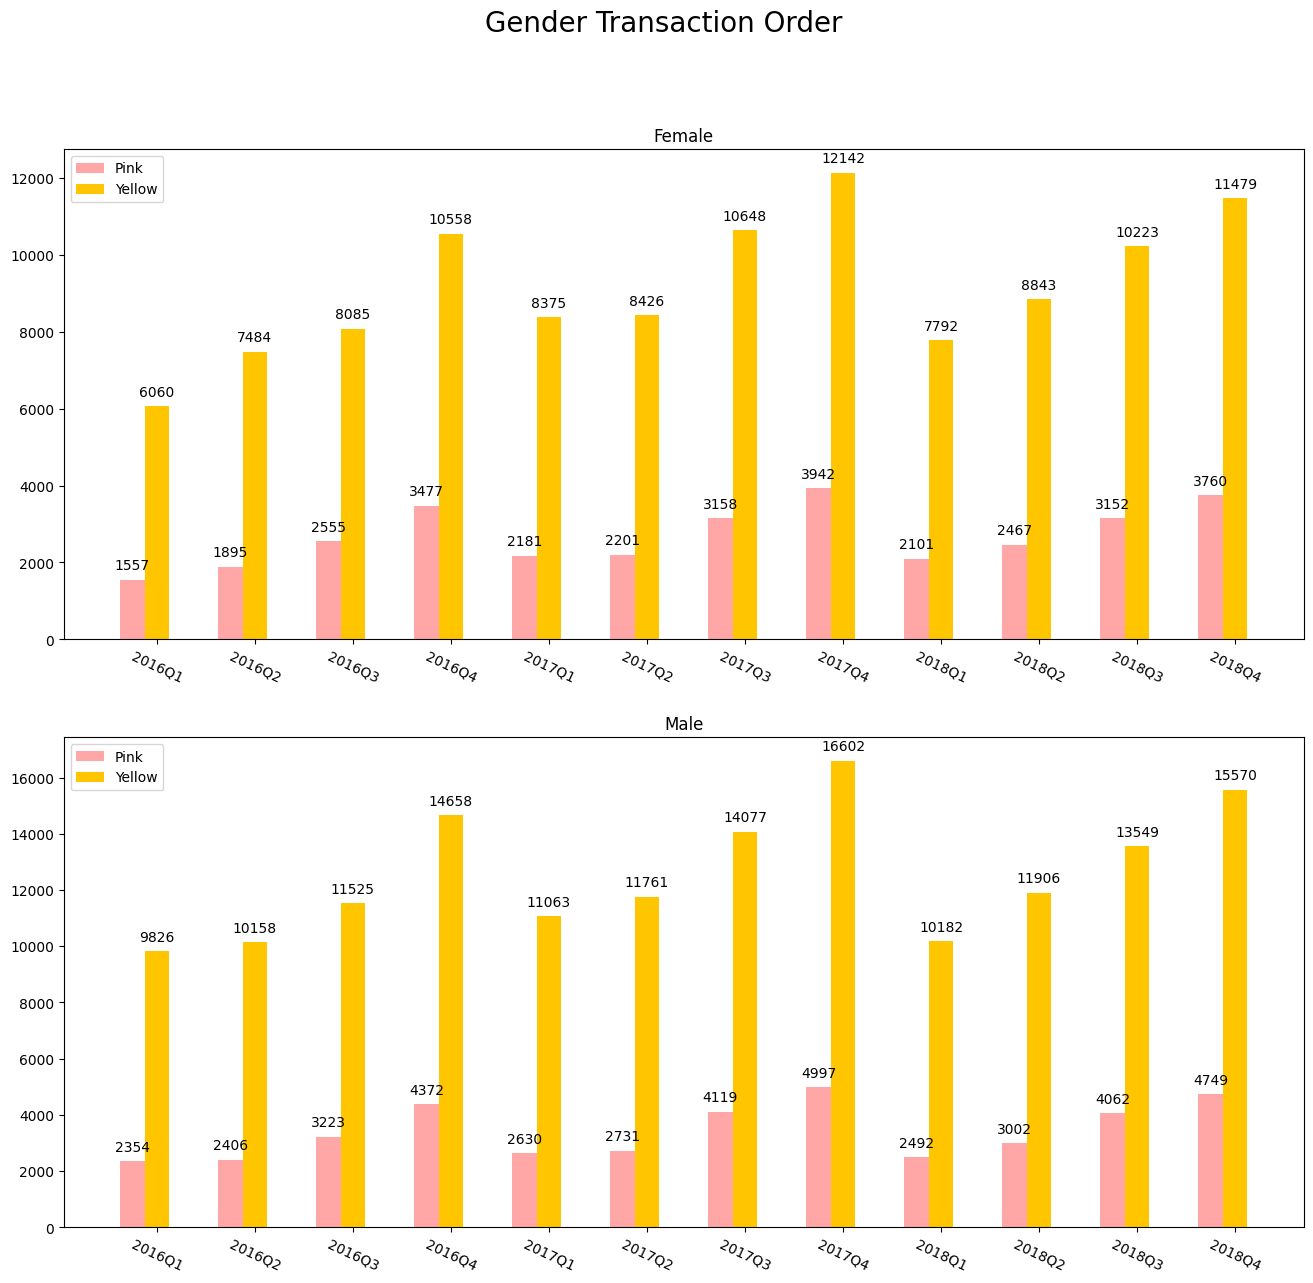

In [705]:
# create a canvas
plt.figure(figsize = (16, 14))
plt.suptitle('Gender Transaction Order', fontsize = 20)
# plt.title('Gender Transaction Order', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Female Section
# ================

plt.subplot(2, 1, 1)
pink_quantile_female = pink_female['quarter']
pink_trx_female = pink_female['trx_id']

# 
yellow_quantile_female = yellow_female['quarter']
yellow_trx_female = yellow_female['trx_id']

# style
multiple_pink_female = np.arange(len(pink_quantile_female))
multiple_yellow_female = np.arange(len(yellow_quantile_female))
my_width = 0.25

# 
pink_female_col = plt.bar(multiple_pink_female, pink_trx_female, width = my_width, label = 'Pink', color = '#ffa7a7')
yellow_female_col = plt.bar(multiple_yellow_female + my_width, yellow_trx_female, width = my_width, label = 'Yellow', color = '#ffc600')

plt.bar_label(pink_female_col, labels = pink_trx_female, label_type = 'edge', padding = 5)
plt.bar_label(yellow_female_col, labels = yellow_trx_female, label_type = 'edge', padding = 5)

plt.title('Female')
plt.xticks(multiple_yellow_female + my_width, pink_quantile_female, rotation = -25)
plt.legend()

# Male Section
# ================

plt.subplot(2, 1, 2)
pink_quantile_male = pink_male['quarter']
pink_trx_male = pink_male['trx_id']

# 
yellow_quantile_male = yellow_male['quarter']
yellow_trx_male = yellow_male['trx_id']

# style
multiple_pink_male = np.arange(len(pink_quantile_male))
multiple_yellow_male = np.arange(len(yellow_quantile_male))
my_width = 0.25

# 
pink_male_col = plt.bar(multiple_pink_male, pink_trx_male, width = my_width, label = 'Pink', color = '#ffa7a7')
yellow_male_col = plt.bar(multiple_yellow_male + my_width, yellow_trx_male, width = my_width, label = 'Yellow', color = '#ffc600')

plt.bar_label(pink_male_col, labels = pink_trx_male, label_type = 'edge', padding = 5)
plt.bar_label(yellow_male_col, labels = yellow_trx_male, label_type = 'edge', padding = 5)

plt.title('Male')
plt.xticks(multiple_yellow_male + my_width, pink_quantile_male, rotation = -25)
plt.legend()

plt.show()

#### Profit by Age

In [765]:
# Group
behave = fin_df.copy()
behave = behave.round(0)

age = behave.groupby(by = ['company', 'age']).agg({'profit': 'sum', 'trx_id': 'count'})
age = pd.DataFrame(age)
age.reset_index(inplace = True)
age.head()

,company,age,profit,trx_id
0,pink cab,18,173367.0,2348
1,pink cab,19,188574.0,2471
2,pink cab,20,191896.0,2511
3,pink cab,21,169561.0,2226
4,pink cab,22,184655.0,2415


In [766]:
# pink company
pink_age_profit = age.copy()
pink_age_profit = pink_age_profit.round(0)
pink_age_profit = pink_age_profit.loc[pink_age_profit['company'] == 'pink cab']
pink_age_profit.head()

,company,age,profit,trx_id
0,pink cab,18,173367.0,2348
1,pink cab,19,188574.0,2471
2,pink cab,20,191896.0,2511
3,pink cab,21,169561.0,2226
4,pink cab,22,184655.0,2415


In [767]:
# yellow company
yellow_age_profit = age.copy()
yellow_age_profit = yellow_age_profit.round(0)
yellow_age_profit = yellow_age_profit.loc[yellow_age_profit['company'] == 'yellow cab']
yellow_age_profit.head()

,company,age,profit,trx_id
48,yellow cab,18,1350998.0,7785
49,yellow cab,19,1295611.0,8256
50,yellow cab,20,1575963.0,8969
51,yellow cab,21,1444329.0,8420
52,yellow cab,22,1459745.0,8516


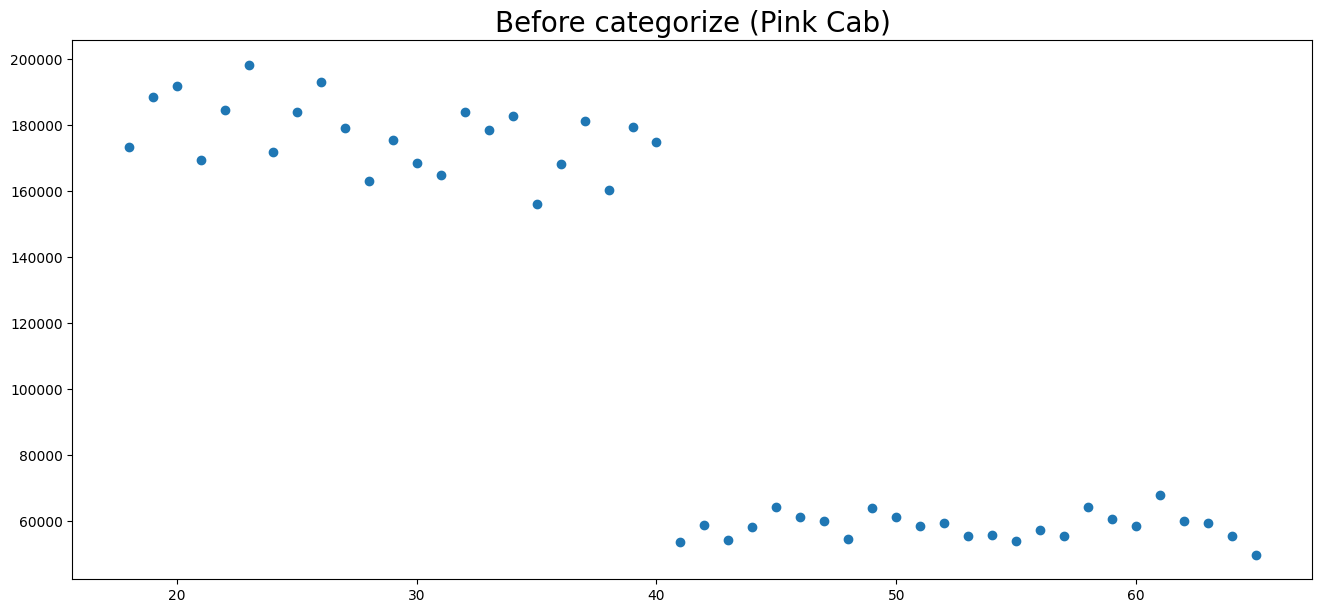

In [768]:
# create canvas
plt.figure(figsize = (16, 7))
plt.title('Before categorize (Pink Cab)', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# pink
pink_age = pink_age_profit['age']
pink_profit = pink_age_profit['profit']

# 
plt.scatter(pink_age, pink_profit)

plt.show()

In [769]:
# determine cluster
k_mean = KMeans(n_clusters = 4)

# predict
pred = k_mean.fit_predict(pink_age_profit[['age', 'profit']])

# cluster
pink_age_profit['cluster'] = pred
pink_age_profit.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,company,age,profit,trx_id,cluster
0,pink cab,18,173367.0,2348,2
1,pink cab,19,188574.0,2471,3
2,pink cab,20,191896.0,2511,3
3,pink cab,21,169561.0,2226,1
4,pink cab,22,184655.0,2415,2


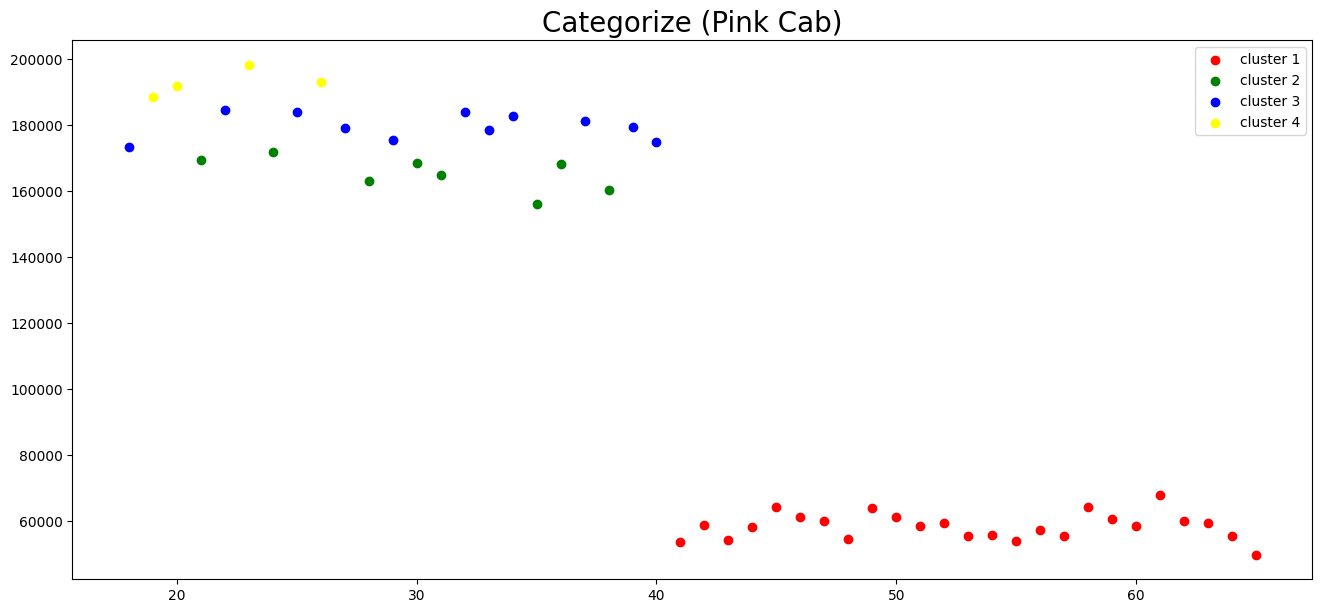

In [770]:
# canvas
plt.figure(figsize = (16, 7))
plt.title('Categorize (Pink Cab)', fontsize = 20)

pink_clus_1 = pink_age_profit[pink_age_profit['cluster'] == 0]
pink_clus_2 = pink_age_profit[pink_age_profit['cluster'] == 1]
pink_clus_3 = pink_age_profit[pink_age_profit['cluster'] == 2]
pink_clus_4 = pink_age_profit[pink_age_profit['cluster'] == 3]

# viz
plt.scatter(pink_clus_1['age'], pink_clus_1['profit'], color = 'red', label = 'cluster 1')
plt.scatter(pink_clus_2['age'], pink_clus_2['profit'], color = 'green', label = 'cluster 2')
plt.scatter(pink_clus_3['age'], pink_clus_3['profit'], color = 'blue', label = 'cluster 3')
plt.scatter(pink_clus_4['age'], pink_clus_4['profit'], color = 'yellow', label = 'cluster 4')

plt.legend()
plt.show()

In [771]:
# Copy data
pink_data_scaling  = pink_age_profit.copy()

# column for scaling
pink_data_scaling['real_age'] = pink_data_scaling['age']
pink_data_scaling['real_profit'] = pink_data_scaling['profit']
pink_data_scaling.head()

,company,age,profit,trx_id,cluster,real_age,real_profit
0,pink cab,18,173367.0,2348,2,18,173367.0
1,pink cab,19,188574.0,2471,3,19,188574.0
2,pink cab,20,191896.0,2511,3,20,191896.0
3,pink cab,21,169561.0,2226,1,21,169561.0
4,pink cab,22,184655.0,2415,2,22,184655.0


In [772]:
multiple_scale = ['age', 'profit']

# scaling
scaler = MinMaxScaler()

# fit and transform
pink_data_scaling[multiple_scale] = scaler.fit_transform(pink_data_scaling[multiple_scale])
pink_data_scaling.head()

,company,age,profit,trx_id,cluster,real_age,real_profit
0,pink cab,0.000000,0.831951,2348,2,18,173367.0
1,pink cab,0.021277,0.934327,2471,3,19,188574.0
2,pink cab,0.042553,0.956692,2511,3,20,191896.0
3,pink cab,0.063830,0.806328,2226,1,21,169561.0
4,pink cab,0.085106,0.907944,2415,2,22,184655.0


In [773]:
# Add new cluster
km = KMeans(n_clusters = 4)

# predict
pred = km.fit_predict(pink_data_scaling[['age', 'profit']])

# add data into data frame
pink_data_scaling['cluster'] = pred
pink_data_scaling.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,company,age,profit,trx_id,cluster,real_age,real_profit
0,pink cab,0.000000,0.831951,2348,2,18,173367.0
1,pink cab,0.021277,0.934327,2471,2,19,188574.0
2,pink cab,0.042553,0.956692,2511,2,20,191896.0
3,pink cab,0.063830,0.806328,2226,2,21,169561.0
4,pink cab,0.085106,0.907944,2415,2,22,184655.0


In [774]:
# add centroid
km.cluster_centers_

array([[0.87234043, 0.05548001],
       [0.34042553, 0.82357821],
       [0.09574468, 0.89994143],
       [0.60638298, 0.06162481]])

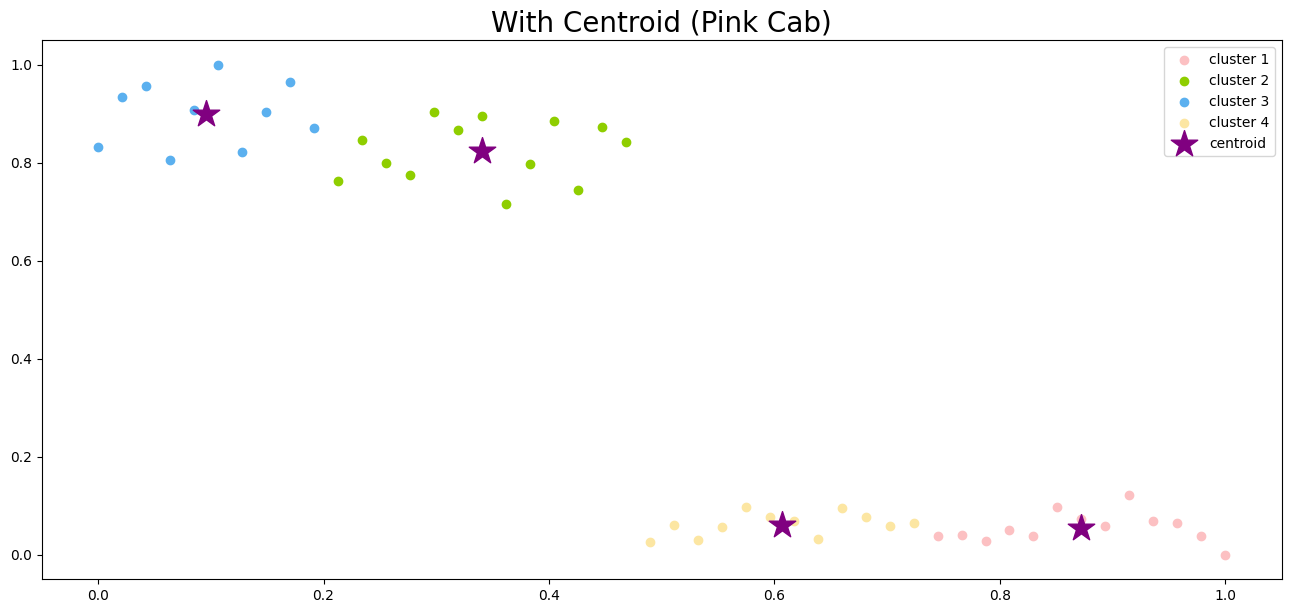

In [775]:
# create a canvas
fig, ax = plt.subplots(figsize = (16, 7))
plt.title('With Centroid (Pink Cab)', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

pink_clus_1 = pink_data_scaling[pink_data_scaling['cluster'] == 0]
pink_clus_2 = pink_data_scaling[pink_data_scaling['cluster'] == 1]
pink_clus_3 = pink_data_scaling[pink_data_scaling['cluster'] == 2]
pink_clus_4 = pink_data_scaling[pink_data_scaling['cluster'] == 3]

# viz
plt.scatter(pink_clus_1['age'], pink_clus_1['profit'], color = '#fcc0c2', label = 'cluster 1')
plt.scatter(pink_clus_2['age'], pink_clus_2['profit'], color = '#8fce00', label = 'cluster 2')
plt.scatter(pink_clus_3['age'], pink_clus_3['profit'], color = '#5bb0ef', label = 'cluster 3')
plt.scatter(pink_clus_4['age'], pink_clus_4['profit'], color = '#fce6a2', label = 'cluster 4')

# centroid
centroids = plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = "*", label = "centroid", s = 400)

plt.legend()
plt.show()

In [776]:
pink_data_scaling

,company,age,profit,trx_id,cluster,real_age,real_profit
0,pink cab,0.000000,0.831951,2348,2,18,173367.0
1,pink cab,0.021277,0.934327,2471,2,19,188574.0
2,pink cab,0.042553,0.956692,2511,2,20,191896.0
3,pink cab,0.063830,0.806328,2226,2,21,169561.0
4,pink cab,0.085106,0.907944,2415,2,22,184655.0


In [777]:
pink_data_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      48 non-null     object 
 1   age          48 non-null     float64
 2   profit       48 non-null     float64
 3   trx_id       48 non-null     int64  
 4   cluster      48 non-null     int32  
 5   real_age     48 non-null     int64  
 6   real_profit  48 non-null     float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.8+ KB


In [778]:
# 
pink_data_scaling['cluster'] = pink_data_scaling['cluster'].astype(str)
old_val = ['0', '1', '2', '3']
new_val = ['elderly', 'middle adult', 'young adult', 'adult']
pink_data_scaling['cluster'] = pink_data_scaling['cluster'].replace(old_val, new_val)
pink_data_scaling

,company,age,profit,trx_id,cluster,real_age,real_profit
0,pink cab,0.000000,0.831951,2348,young adult,18,173367.0
1,pink cab,0.021277,0.934327,2471,young adult,19,188574.0
2,pink cab,0.042553,0.956692,2511,young adult,20,191896.0
3,pink cab,0.063830,0.806328,2226,young adult,21,169561.0
4,pink cab,0.085106,0.907944,2415,young adult,22,184655.0
5,pink cab,0.106383,1.000000,2530,young adult,23,198329.0
6,pink cab,0.127660,0.822216,2309,young adult,24,171921.0
7,pink cab,0.148936,0.903501,2453,young adult,25,183995.0
8,pink cab,0.170213,0.965403,2529,young adult,26,193190.0
9,pink cab,0.191489,0.871052,2386,young adult,27,179175.0


In [779]:
pink_data_scaling.rename(columns = {'cluster': 'age_category'}, inplace = True)
pink_data_scaling.head()

,company,age,profit,trx_id,age_category,real_age,real_profit
0,pink cab,0.000000,0.831951,2348,young adult,18,173367.0
1,pink cab,0.021277,0.934327,2471,young adult,19,188574.0
2,pink cab,0.042553,0.956692,2511,young adult,20,191896.0
3,pink cab,0.063830,0.806328,2226,young adult,21,169561.0
4,pink cab,0.085106,0.907944,2415,young adult,22,184655.0


In [782]:
pink_age_cat = pink_data_scaling.groupby(by = ['age_category']).agg({'real_profit': 'sum', 'trx_id': 'sum'})
pink_age_cat = pd.DataFrame(pink_age_cat)
pink_age_cat.reset_index(inplace = True)
pink_age_cat.head()

,age_category,real_profit,trx_id
0,adult,707313.0,9527
1,elderly,754390.0,10108
2,middle adult,2237603.0,29770
3,young adult,1834663.0,24178


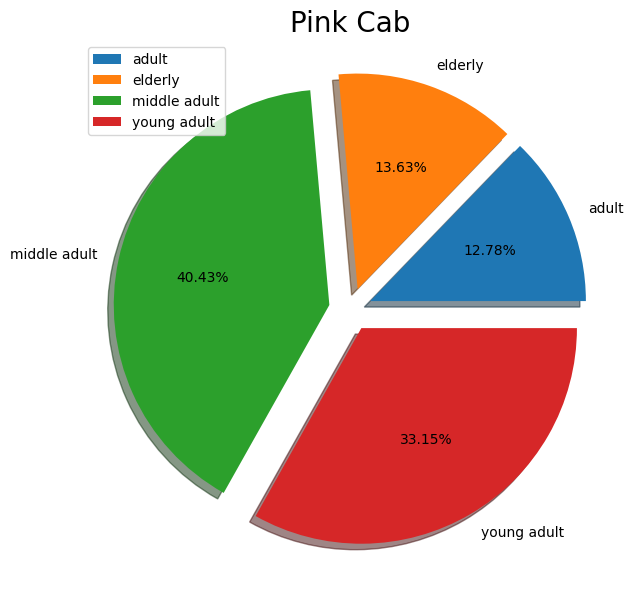

In [788]:
# create canvas
plt.figure(figsize = (16, 7))
plt.title('Pink Cab', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# parameter
pink_category = pink_age_cat['age_category']
pink_value = pink_age_cat['real_profit']

# style
slice = [0.1, 0.1, 0.1, 0.1]

# plt.subplot(1, 2, 1)
plt.pie(pink_value, labels = pink_category, autopct='%.2f%%', explode = slice, shadow = True)
# plt.title('Pink Cab', fontsize = 20)
plt.legend()

#### yellow age sample

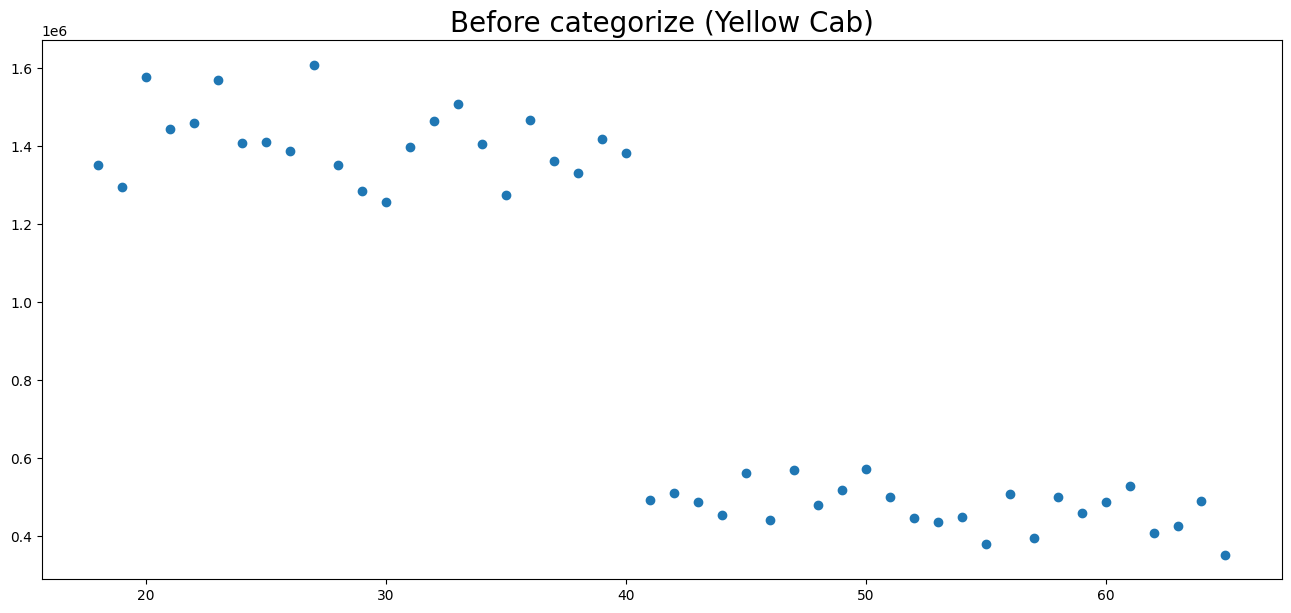

In [789]:
# create canvas
plt.figure(figsize = (16, 7))
plt.title('Before categorize (Yellow Cab)', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# pink
yellow_age = yellow_age_profit['age']
yellow_profit = yellow_age_profit['profit']

# 
plt.scatter(yellow_age, yellow_profit)

plt.show()

In [790]:
# determine cluster
k_mean = KMeans(n_clusters = 4)

# predict
pred = k_mean.fit_predict(yellow_age_profit[['age', 'profit']])

# cluster
yellow_age_profit['cluster'] = pred
yellow_age_profit.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,company,age,profit,trx_id,cluster
48,yellow cab,18,1350998.0,7785,2
49,yellow cab,19,1295611.0,8256,2
50,yellow cab,20,1575963.0,8969,0
51,yellow cab,21,1444329.0,8420,0
52,yellow cab,22,1459745.0,8516,0


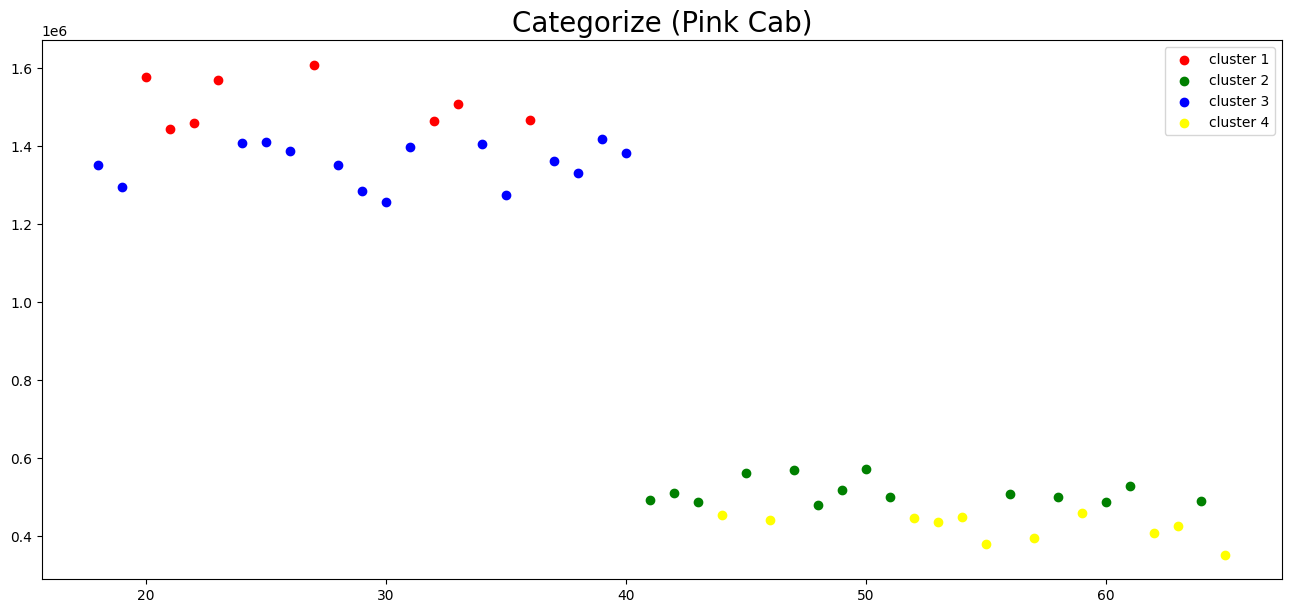

In [791]:
# canvas
plt.figure(figsize = (16, 7))
plt.title('Categorize (Pink Cab)', fontsize = 20)

yellow_clus_1 = yellow_data_scaling[yellow_data_scaling['cluster'] == 0]
yellow_clus_2 = yellow_data_scaling[yellow_data_scaling['cluster'] == 1]
yellow_clus_3 = yellow_data_scaling[yellow_data_scaling['cluster'] == 2]
yellow_clus_4 = yellow_data_scaling[yellow_data_scaling['cluster'] == 3]

# viz
plt.scatter(yellow_clus_1['age'], yellow_clus_1['profit'], color = '#fcc0c2', label = 'cluster 1')
plt.scatter(yellow_clus_2['age'], yellow_clus_2['profit'], color = '#8fce00', label = 'cluster 2')
plt.scatter(yellow_clus_3['age'], yellow_clus_3['profit'], color = '#5bb0ef', label = 'cluster 3')
plt.scatter(yellow_clus_4['age'], yellow_clus_4['profit'], color = '#fce6a2', label = 'cluster 4')

plt.legend()
plt.show()

In [792]:
# Copy data
yellow_data_scaling  = yellow_age_profit.copy()

# column for scaling
yellow_data_scaling['real_age'] = yellow_data_scaling['age']
yellow_data_scaling['real_profit'] = yellow_data_scaling['profit']
yellow_data_scaling.head()

,company,age,profit,trx_id,cluster,real_age,real_profit
48,yellow cab,18,1350998.0,7785,2,18,1350998.0
49,yellow cab,19,1295611.0,8256,2,19,1295611.0
50,yellow cab,20,1575963.0,8969,0,20,1575963.0
51,yellow cab,21,1444329.0,8420,0,21,1444329.0
52,yellow cab,22,1459745.0,8516,0,22,1459745.0


In [793]:
multiple_scale = ['age', 'profit']

# scaling
scaler = MinMaxScaler()

# fit and transform
yellow_data_scaling[multiple_scale] = scaler.fit_transform(yellow_data_scaling[multiple_scale])
yellow_data_scaling.head()

,company,age,profit,trx_id,cluster,real_age,real_profit
48,yellow cab,0.000000,0.795079,7785,2,18,1350998.0
49,yellow cab,0.021277,0.750953,8256,2,19,1295611.0
50,yellow cab,0.042553,0.974305,8969,0,20,1575963.0
51,yellow cab,0.063830,0.869434,8420,0,21,1444329.0
52,yellow cab,0.085106,0.881716,8516,0,22,1459745.0


In [794]:
# Add new cluster
km = KMeans(n_clusters = 4)

# predict
pred = km.fit_predict(yellow_data_scaling[['age', 'profit']])

# add data into data frame
yellow_data_scaling['cluster'] = pred
yellow_data_scaling.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,company,age,profit,trx_id,cluster,real_age,real_profit
48,yellow cab,0.000000,0.795079,7785,2,18,1350998.0
49,yellow cab,0.021277,0.750953,8256,2,19,1295611.0
50,yellow cab,0.042553,0.974305,8969,2,20,1575963.0
51,yellow cab,0.063830,0.869434,8420,2,21,1444329.0
52,yellow cab,0.085106,0.881716,8516,2,22,1459745.0


In [795]:
# add centroid
km.cluster_centers_

array([[0.87234043, 0.07585166],
       [0.35106383, 0.81769979],
       [0.10638298, 0.86735596],
       [0.60638298, 0.119838  ]])

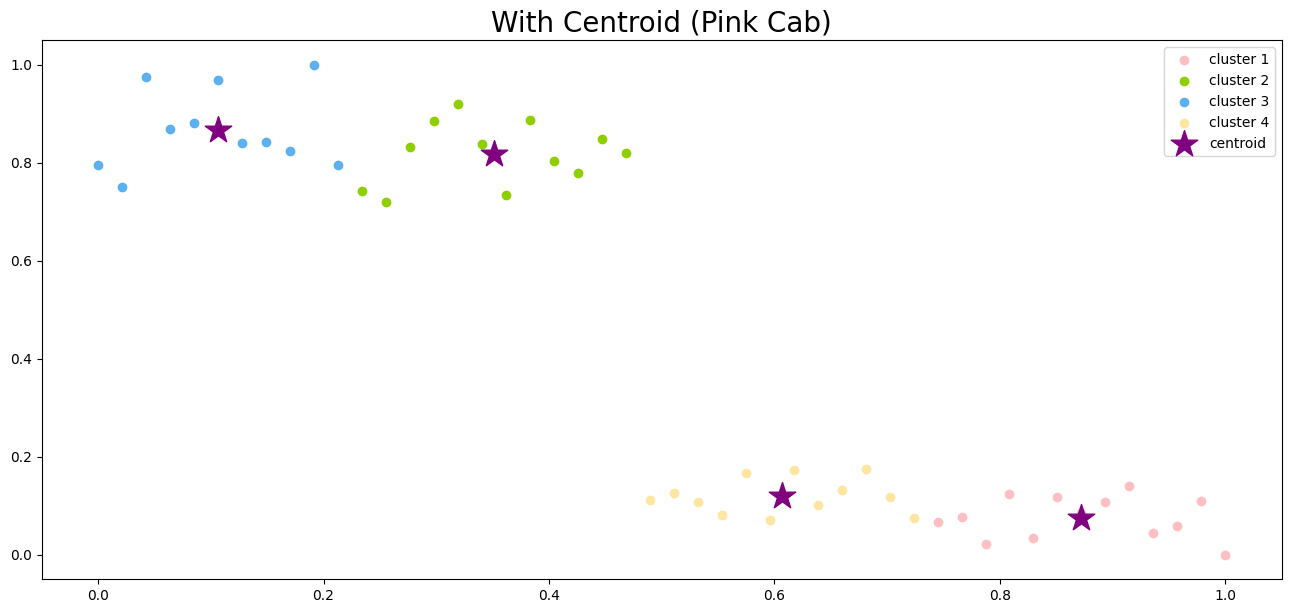

In [796]:
# create a canvas
fig, ax = plt.subplots(figsize = (16, 7))
plt.title('With Centroid (Yellow Cab)', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

yellow_clus_1 = yellow_data_scaling[yellow_data_scaling['cluster'] == 0]
yellow_clus_2 = yellow_data_scaling[yellow_data_scaling['cluster'] == 1]
yellow_clus_3 = yellow_data_scaling[yellow_data_scaling['cluster'] == 2]
yellow_clus_4 = yellow_data_scaling[yellow_data_scaling['cluster'] == 3]

# viz
plt.scatter(yellow_clus_1['age'], yellow_clus_1['profit'], color = '#fcc0c2', label = 'cluster 1')
plt.scatter(yellow_clus_2['age'], yellow_clus_2['profit'], color = '#8fce00', label = 'cluster 2')
plt.scatter(yellow_clus_3['age'], yellow_clus_3['profit'], color = '#5bb0ef', label = 'cluster 3')
plt.scatter(yellow_clus_4['age'], yellow_clus_4['profit'], color = '#fce6a2', label = 'cluster 4')

# centroid
centroids = plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = "*", label = "centroid", s = 400)

plt.legend()
plt.show()

In [797]:
yellow_data_scaling

,company,age,profit,trx_id,cluster,real_age,real_profit
48,yellow cab,0.000000,0.795079,7785,2,18,1350998.0
49,yellow cab,0.021277,0.750953,8256,2,19,1295611.0
50,yellow cab,0.042553,0.974305,8969,2,20,1575963.0
51,yellow cab,0.063830,0.869434,8420,2,21,1444329.0
52,yellow cab,0.085106,0.881716,8516,2,22,1459745.0
53,yellow cab,0.106383,0.968072,9009,2,23,1568140.0
54,yellow cab,0.127660,0.839603,8093,2,24,1406884.0
55,yellow cab,0.148936,0.841948,8653,2,25,1409828.0
56,yellow cab,0.170213,0.823970,8360,2,26,1387262.0
57,yellow cab,0.191489,1.000000,8861,2,27,1608216.0


In [798]:
yellow_data_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 48 to 95
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      48 non-null     object 
 1   age          48 non-null     float64
 2   profit       48 non-null     float64
 3   trx_id       48 non-null     int64  
 4   cluster      48 non-null     int32  
 5   real_age     48 non-null     int64  
 6   real_profit  48 non-null     float64
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.8+ KB


In [799]:
# 
yellow_data_scaling['cluster'] = yellow_data_scaling['cluster'].astype(str)
old_val = ['0', '1', '2', '3']
new_val = ['elderly', 'middle adult', 'young adult', 'adult']
yellow_data_scaling['cluster'] = yellow_data_scaling['cluster'].replace(old_val, new_val)
yellow_data_scaling

,company,age,profit,trx_id,cluster,real_age,real_profit
48,yellow cab,0.000000,0.795079,7785,young adult,18,1350998.0
49,yellow cab,0.021277,0.750953,8256,young adult,19,1295611.0
50,yellow cab,0.042553,0.974305,8969,young adult,20,1575963.0
51,yellow cab,0.063830,0.869434,8420,young adult,21,1444329.0
52,yellow cab,0.085106,0.881716,8516,young adult,22,1459745.0
53,yellow cab,0.106383,0.968072,9009,young adult,23,1568140.0
54,yellow cab,0.127660,0.839603,8093,young adult,24,1406884.0
55,yellow cab,0.148936,0.841948,8653,young adult,25,1409828.0
56,yellow cab,0.170213,0.823970,8360,young adult,26,1387262.0
57,yellow cab,0.191489,1.000000,8861,young adult,27,1608216.0


In [800]:
yellow_data_scaling.rename(columns = {'cluster': 'age_category'}, inplace = True)
yellow_data_scaling.head()

,company,age,profit,trx_id,age_category,real_age,real_profit
48,yellow cab,0.000000,0.795079,7785,young adult,18,1350998.0
49,yellow cab,0.021277,0.750953,8256,young adult,19,1295611.0
50,yellow cab,0.042553,0.974305,8969,young adult,20,1575963.0
51,yellow cab,0.063830,0.869434,8420,young adult,21,1444329.0
52,yellow cab,0.085106,0.881716,8516,young adult,22,1459745.0


In [801]:
yellow_age_cat = yellow_data_scaling.groupby(by = ['age_category']).agg({'real_profit': 'sum', 'trx_id': 'sum'})
yellow_age_cat = pd.DataFrame(yellow_age_cat)
yellow_age_cat.reset_index(inplace = True)
yellow_age_cat.head()

,age_category,real_profit,trx_id
0,adult,6041166.0,34603
1,elderly,5826841.0,35338
2,middle adult,16552698.0,97960
3,young adult,15858923.0,93091


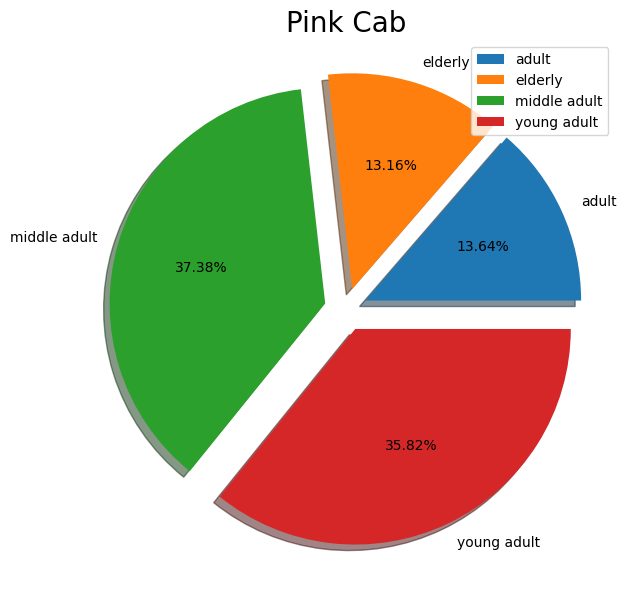

In [802]:
# create canvas
plt.figure(figsize = (16, 7))
plt.title('Yellow Cab', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# parameter
yellow_category = yellow_age_cat['age_category']
yellow_value = yellow_age_cat['real_profit']

# style
slice = [0.1, 0.1, 0.1, 0.1]

# plt.subplot(1, 2, 1)
plt.pie(yellow_value, labels = yellow_category, autopct='%.2f%%', explode = slice, shadow = True)
# plt.title('Pink Cab', fontsize = 20)
plt.legend()

combine pie plot

In [ ]:
# create canvas
plt.figure(figsize = (16, 7))
plt.suptitle('Profit Behaviour by Gender', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 30

# pink parameter
plt.subplot(1, 2, 1)
pink_category = pink_age_cat['age_category']
pink_value = pink_age_cat['real_profit']

# style
slice = [0.1, 0.1, 0.1, 0.1]

plt.pie(pink_value, labels = pink_category, autopct='%.2f%%', explode = slice, shadow = True)
plt.title('Pink Cab', fontsize = 20)
plt.legend()

# yellow parameter
plt.subplot(1, 2, 2)
yellow_category = yellow_age_cat['age_category']
yellow_value = yellow_age_cat['real_profit']

# style
slice = [0.1, 0.1, 0.1, 0.1]

plt.pie(yellow_value, labels = yellow_category, autopct='%.2f%%', explode = slice, shadow = True)
plt.title('Yellow Cab', fontsize = 20)
plt.legend()

plt.show()

#### Transaction by Age

In [ ]:
pink_age_cat

In [ ]:
yellow_age_cat

In [ ]:
# create a canvas
plt.figure(figsize = (16, 14))
plt.title('Gender Transaction Order', fontsize = 20)

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# Pink Age Section
# ================

cat_age_pink = pink_age_cat['age_category']
cat_trx_pink = pink_age_cat['trx_id']

# style
multiple_cat_pink_age = np.arange(len(cat_age_pink))
my_width = 0.25

# 
pink_cat_age = plt.bar(multiple_cat_pink_age, cat_trx_pink, width = my_width, label = 'Pink', color = '#ffa7a7')
plt.bar_label(pink_cat_age, labels = cat_trx_pink, label_type = 'edge', padding = 5)

# Yellow Age Section
# ================

cat_age_yellow = yellow_age_cat['age_category']
cat_trx_yellow = yellow_age_cat['trx_id']

# style
multiple_cat_yellow_age = np.arange(len(cat_age_yellow))
my_width = 0.25

#
yellow_cat_age = plt.bar(multiple_cat_yellow_age + my_width, cat_trx_yellow, width = my_width, label = 'Yellow', color = '#ffc600')
plt.bar_label(yellow_cat_age, labels = cat_trx_yellow, label_type = 'edge', padding = 5)

plt.xticks(multiple_cat_yellow_age + my_width, cat_trx_pink, rotation = -25)
plt.legend()

plt.show()

### Which customer categories provide more potential?

In [723]:
# Group
categories = fin_df.copy()
categories = categories.round(0)

age = behave.groupby(by = ['company', 'first_day_month', 'gender']).agg({'profit': 'sum', 'trx_id': 'count'})
age = pd.DataFrame(age)
age.reset_index(inplace = True)
age

,company,first_day_month,gender,profit,trx_id
0,pink cab,2016-01-01,female,28990.0,328
1,pink cab,2016-01-01,male,59035.0,758
2,pink cab,2016-02-01,female,50887.0,586
3,pink cab,2016-02-01,male,66740.0,721
4,pink cab,2016-03-01,female,54664.0,643
...,...,...,...,...,...
139,yellow cab,2018-10-01,male,747068.0,5062
140,yellow cab,2018-11-01,female,455327.0,3511
141,yellow cab,2018-11-01,male,665765.0,4890
142,yellow cab,2018-12-01,female,610972.0,4188


### How is the traffic condition on weekdays, weekends and holidays ?

### Which areas have higher potential for investment in each company ?

### What are the predictions for the company's condition for the next year?

# SAMPLE

#### Clustering Methode

In [724]:
# Group
group_sample = fin_df.copy()
group_sample = group_sample.round(0)
travel_gp = group_sample.groupby(by = 'travel(km)').agg({'profit': 'sum'})
travel_gp = pd.DataFrame(travel_gp)
travel_gp.reset_index(inplace = True)
travel_gp.head()

,travel(km),profit
0,2.0,119043.0
1,3.0,154525.0
2,4.0,193861.0
3,5.0,246176.0
4,6.0,326821.0


C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\3081987287.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


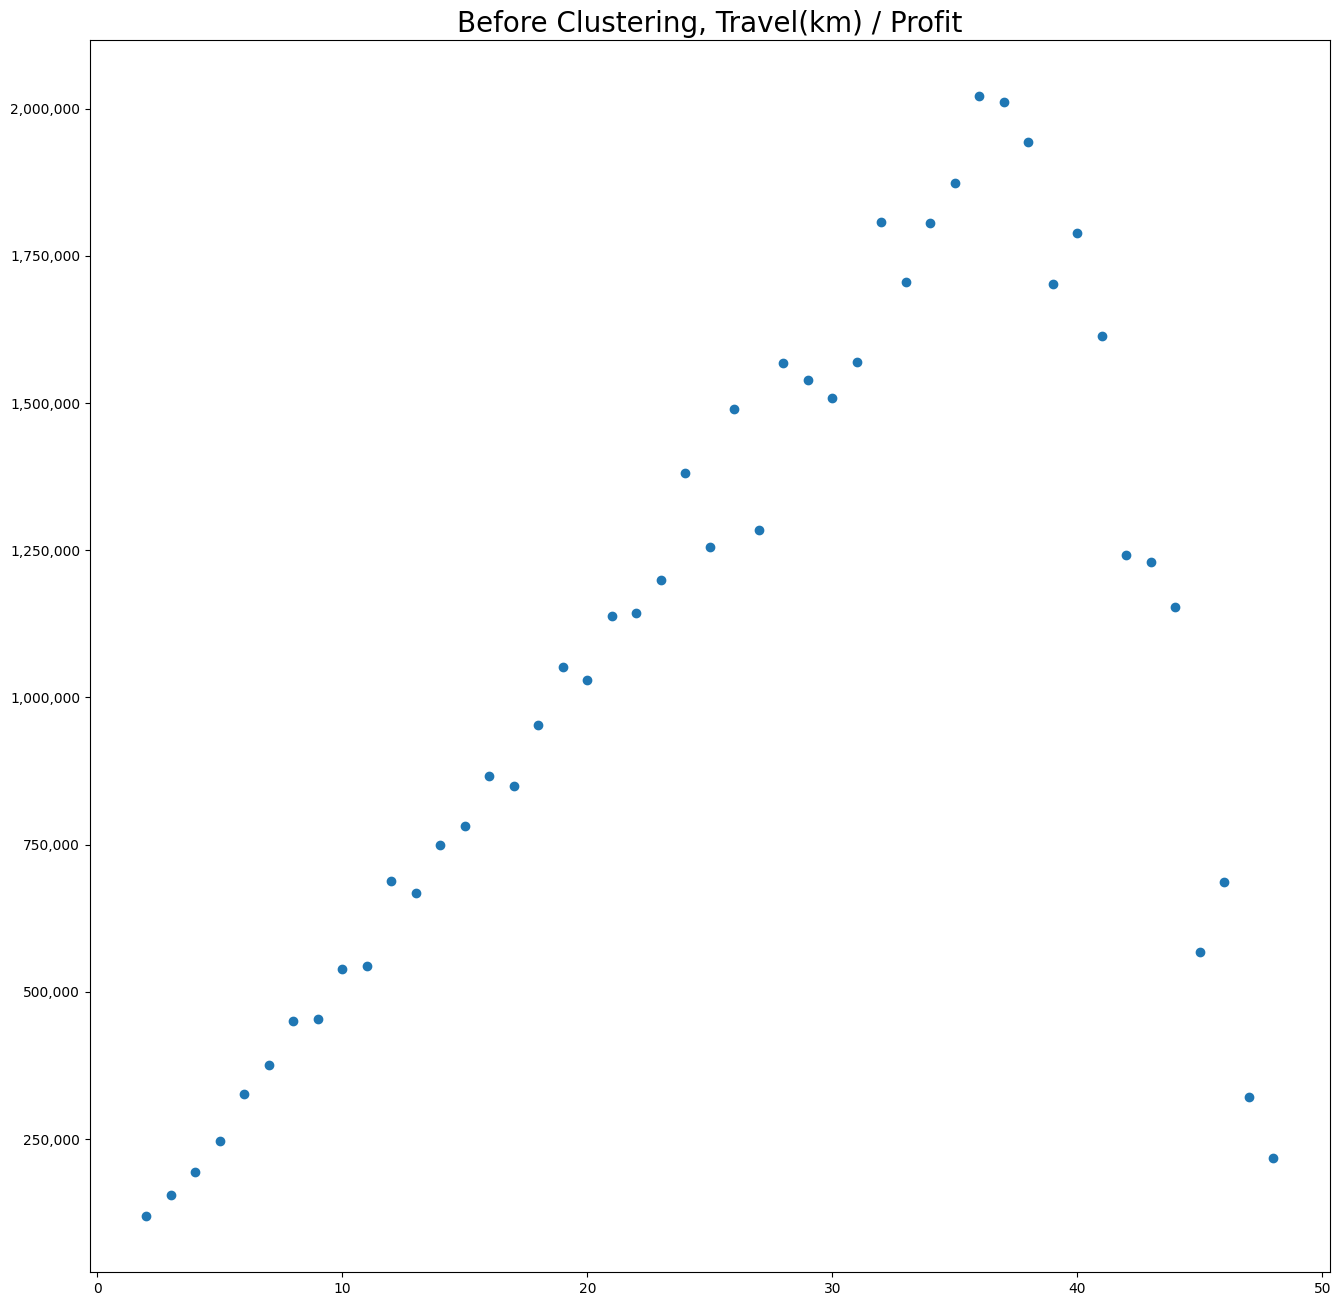

In [725]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

# axis
travel = travel_gp['travel(km)']
total_price = travel_gp['profit']

# viz
check_cluster = plt.scatter(travel, total_price)

# theme
plt.title('Before Clustering, Travel(km) / Profit', fontsize = 20)

# format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()

In [726]:
# determine cluster
k_mean = KMeans(n_clusters = 4)

# predict
pred = k_mean.fit_predict(travel_gp[['travel(km)', 'profit']])

# cluster
travel_gp['cluster'] = pred
travel_gp.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,travel(km),profit,cluster
0,2.0,119043.0,0
1,3.0,154525.0,0
2,4.0,193861.0,0
3,5.0,246176.0,0
4,6.0,326821.0,0


C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\1284951596.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


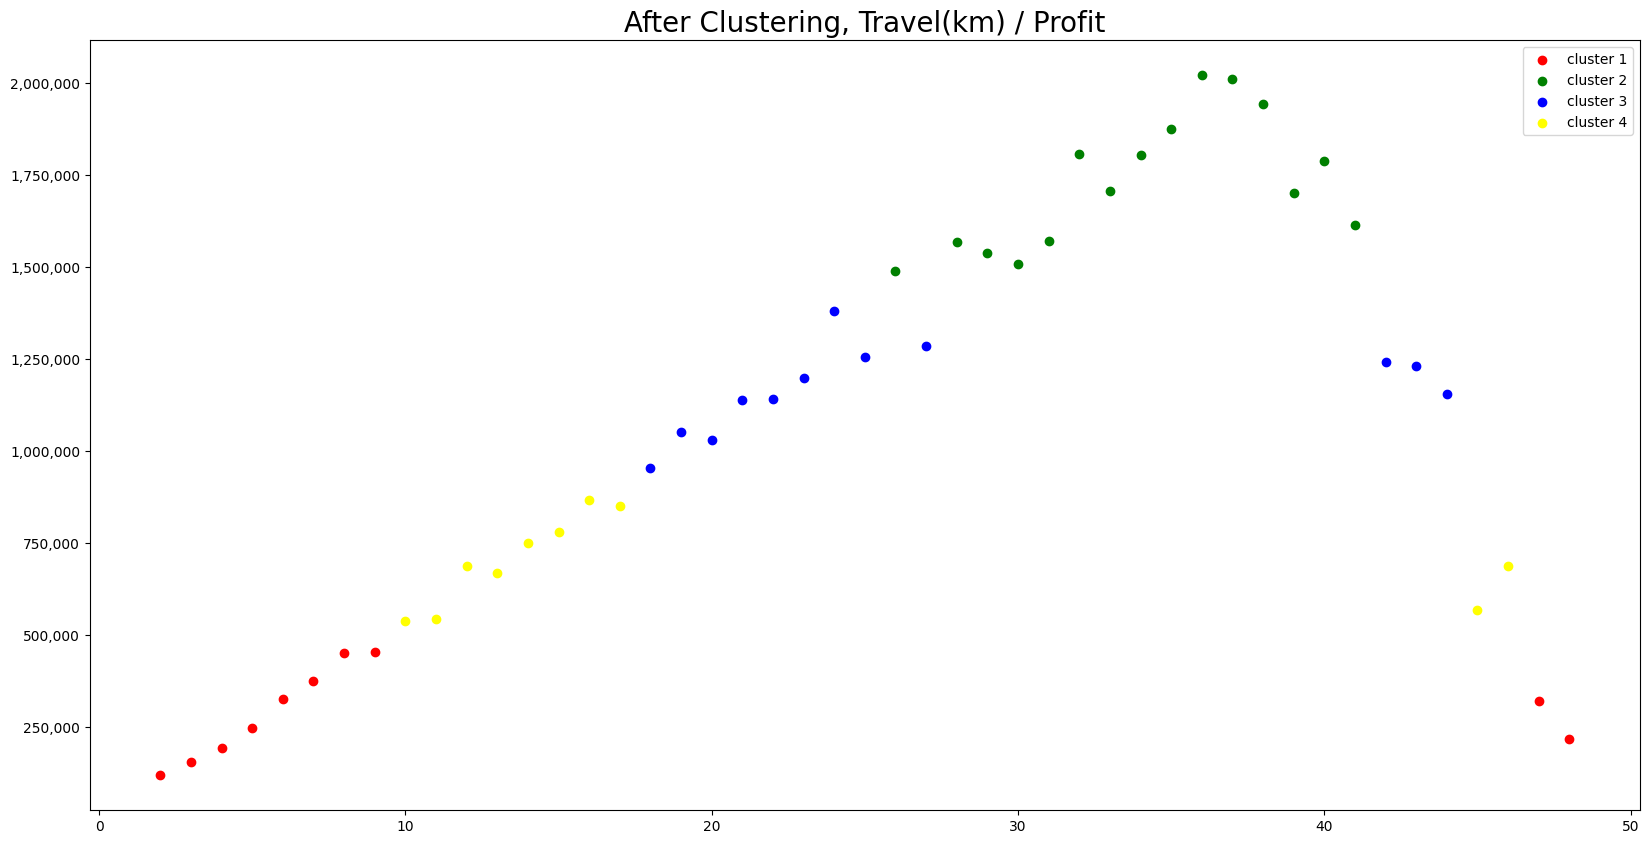

In [727]:
# canvas
plt.figure(figsize = (20, 10))

clus_1 = travel_gp[travel_gp['cluster'] == 0]
clus_2 = travel_gp[travel_gp['cluster'] == 1]
clus_3 = travel_gp[travel_gp['cluster'] == 2]
clus_4 = travel_gp[travel_gp['cluster'] == 3]

# viz
cluster_1 = plt.scatter(clus_1['travel(km)'], clus_1['profit'], color = 'red', label = 'cluster 1')
cluster_2 = plt.scatter(clus_2['travel(km)'], clus_2['profit'], color = 'green', label = 'cluster 2')
cluster_3 = plt.scatter(clus_3['travel(km)'], clus_3['profit'], color = 'blue', label = 'cluster 3')
cluster_4 = plt.scatter(clus_4['travel(km)'], clus_4['profit'], color = 'yellow', label = 'cluster 4')

# theme
plt.title('After Clustering, Travel(km) / Profit', fontsize = 20)

# format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.legend()
plt.show()

In [728]:
# Copy data
data_scaling  = travel_gp.copy()

# column for scaling
multiple_scale = ['travel(km)', 'profit']

# scaling
scaler = MinMaxScaler()

# fit and transform
data_scaling[multiple_scale] = scaler.fit_transform(data_scaling[multiple_scale])
data_scaling.head()

,travel(km),profit,cluster
0,0.000000,0.000000,0
1,0.021739,0.018657,0
2,0.043478,0.039340,0
3,0.065217,0.066848,0
4,0.086957,0.109251,0


In [729]:
# Add new cluster
km = KMeans(n_clusters = 4)

# predict
pred = km.fit_predict(data_scaling[['travel(km)', 'profit']])

# add data into data frame
data_scaling['cluster'] = pred
data_scaling.head()

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,travel(km),profit,cluster
0,0.000000,0.000000,3
1,0.021739,0.018657,3
2,0.043478,0.039340,3
3,0.065217,0.066848,3
4,0.086957,0.109251,3


In [730]:
# add centroid
km.cluster_centers_

array([[0.39297659, 0.49096148],
       [0.93478261, 0.34453398],
       [0.6942029 , 0.8470381 ],
       [0.11956522, 0.14589027]])

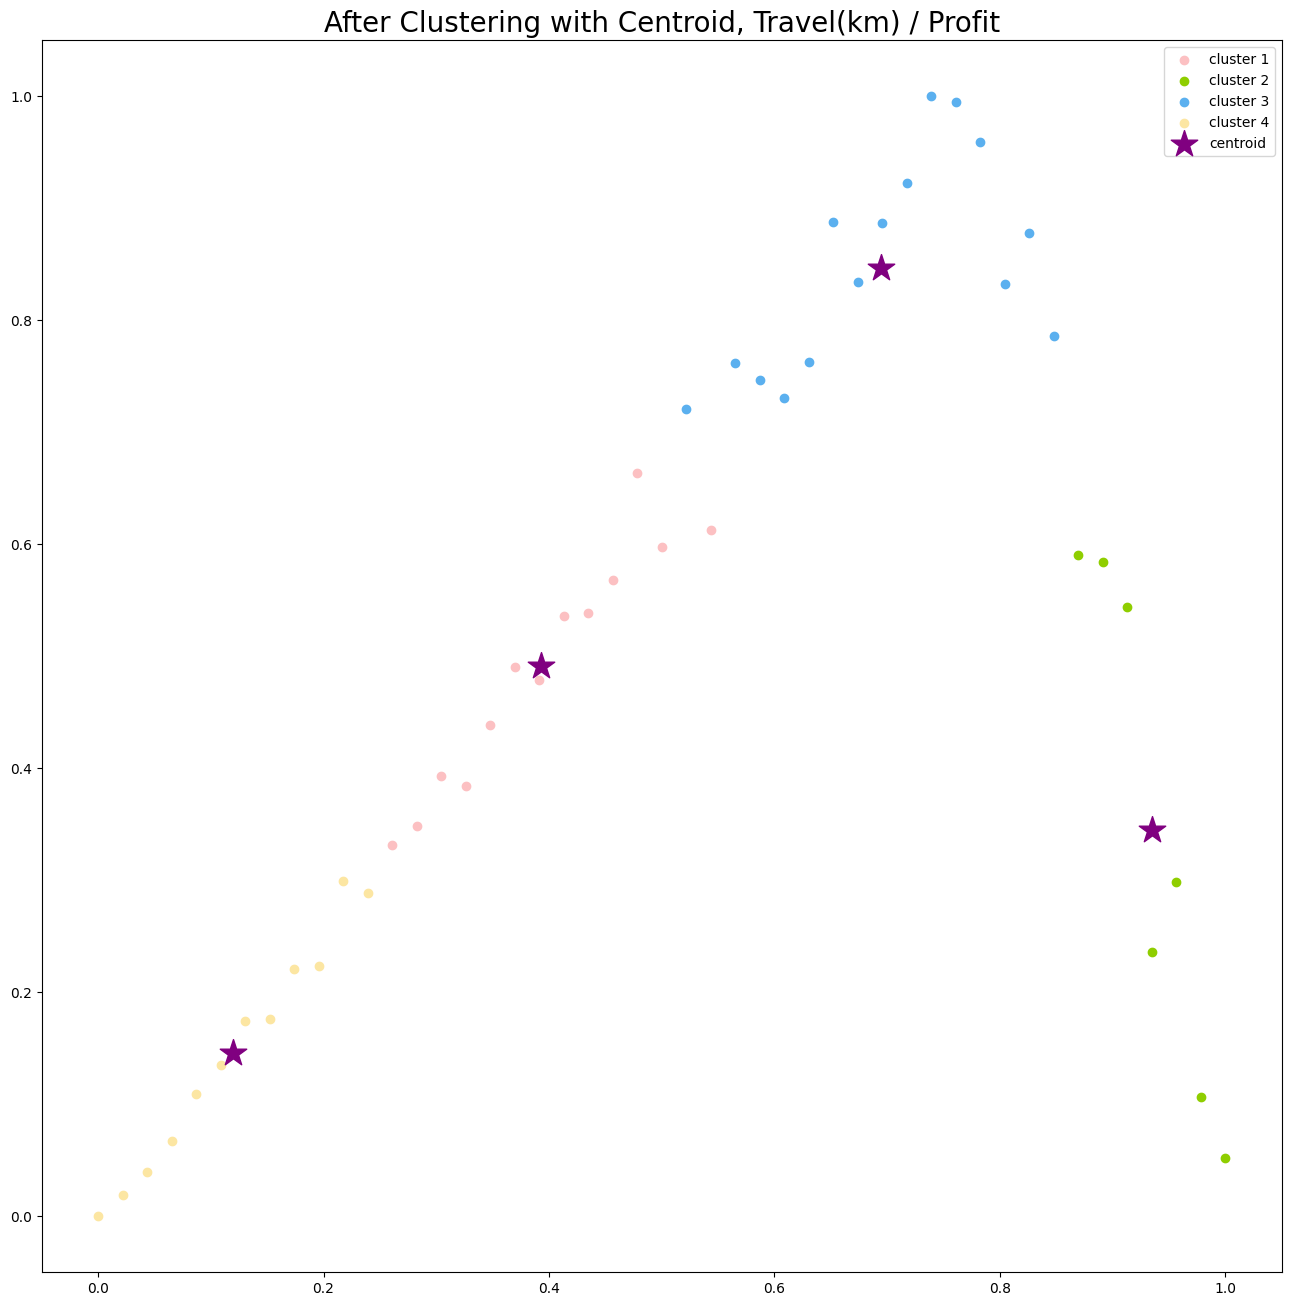

In [731]:
# create a canvas
fig, ax = plt.subplots(figsize=(16,16))

# tick fontsize and label fontsize
tick_size = 30
label_size = 36

clus_1 = data_scaling[data_scaling['cluster'] == 0]
clus_2 = data_scaling[data_scaling['cluster'] == 1]
clus_3 = data_scaling[data_scaling['cluster'] == 2]
clus_4 = data_scaling[data_scaling['cluster'] == 3]

# viz
cluster_1 = plt.scatter(clus_1['travel(km)'], clus_1['profit'], color = '#fcc0c2', label = 'cluster 1')
cluster_2 = plt.scatter(clus_2['travel(km)'], clus_2['profit'], color = '#8fce00', label = 'cluster 2')
cluster_3 = plt.scatter(clus_3['travel(km)'], clus_3['profit'], color = '#5bb0ef', label = 'cluster 3')
cluster_4 = plt.scatter(clus_4['travel(km)'], clus_4['profit'], color = '#fce6a2', label = 'cluster 4')

# centroid
centroids = plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = "purple", marker = "*", label = "centroid", s = 400)

# theme
plt.title('After Clustering with Centroid, Travel(km) / Profit', fontsize = 20)

plt.legend()
plt.show()

#### Forecasting

In [732]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334575 entries, 0 to 334574
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            334575 non-null  object        
 1   date              334575 non-null  datetime64[ns]
 2   company           334575 non-null  object        
 3   city              334575 non-null  object        
 4   travel(km)        334575 non-null  float64       
 5   charged           334575 non-null  float64       
 6   cost              334575 non-null  float64       
 7   profit            334575 non-null  float64       
 8   population        334575 non-null  int64         
 9   users             334575 non-null  int64         
 10  non_users         334575 non-null  int64         
 11  cust_id           334575 non-null  object        
 12  payment           334575 non-null  object        
 13  gender            334575 non-null  object        
 14  age 

In [733]:
# group choosen data
sample = fin_df.groupby(['company', 'first_day_month']).agg({'profit': 'sum'})

sample = pd.DataFrame(sample)
sample.reset_index(inplace = True)
sample

,company,first_day_month,profit
0,pink cab,2016-01-01,88022.36
1,pink cab,2016-02-01,117622.92
2,pink cab,2016-03-01,141023.28
3,pink cab,2016-04-01,104971.52
4,pink cab,2016-05-01,98917.72
...,...,...,...
67,yellow cab,2018-08-01,1018118.37
68,yellow cab,2018-09-01,1298355.21
69,yellow cab,2018-10-01,1293505.77
70,yellow cab,2018-11-01,1121118.98


##### Pink Cab Company

In [734]:
# pink cab
sample_pink = sample.loc[sample['company'] == 'pink cab']
sample_pink = sample_pink[['first_day_month', 'profit']]
sample_pink = sample_pink.set_index('first_day_month')
sample_pink.head()

,profit
first_day_month,
2016-01-01,88022.36
2016-02-01,117622.92
2016-03-01,141023.28
2016-04-01,104971.52
2016-05-01,98917.72


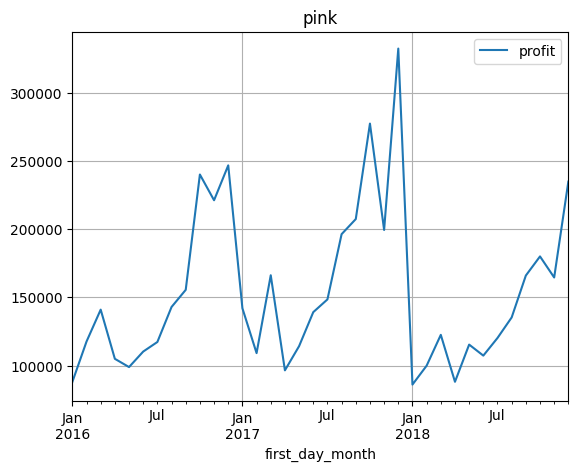

In [735]:
sample_pink.plot().set_title('pink')
plt.grid()
plt.show()

In [736]:
# pink model
train_pink = sample_pink[sample_pink.index.year <= 2018]
test_pink = sample_pink[sample_pink.index.year > 2017]

print(train_pink.shape)
print(test_pink.shape)

(36, 1)
(12, 1)


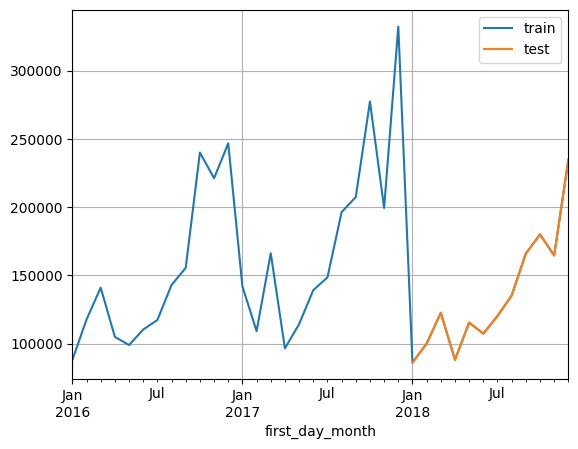

In [737]:
# train and test
train_pink['profit'].plot()
test_pink['profit'].plot()

plt.grid()
plt.legend(['train', 'test'])
plt.show()

In [738]:
# pink time
train_pt = [i + 1 for i in  range(len(train_pink))]
test_pt = [i + 1 for i in range(len(test_pink))]
len(train_pt), len(test_pt)

(36, 12)

In [739]:
# add into df
train_pink['time'] = train_pt
test_pink['time'] = test_pt

C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\1859569769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pink['time'] = test_pt


In [740]:
# linear regression train
lr = LinearRegression()
lr.fit(train_pink[['time']], train_pink['profit'].values)
train_pink.head()

,profit,time
first_day_month,,
2016-01-01,88022.36,1
2016-02-01,117622.92,2
2016-03-01,141023.28,3
2016-04-01,104971.52,4
2016-05-01,98917.72,5


C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\750026128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_pink['forecast'] = test_pred_model


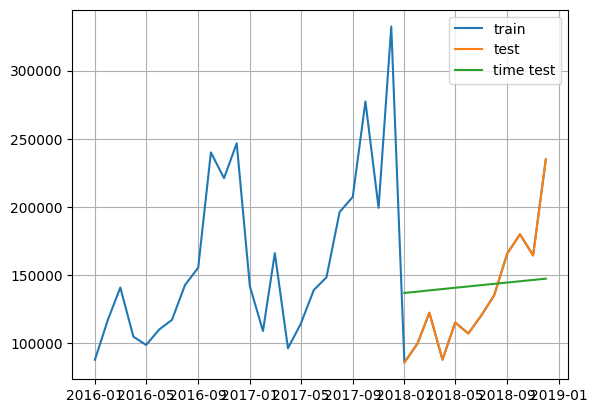

In [741]:
# linear Regression test
test_pred_model = lr.predict(test_pink[['time']])
test_pink['forecast'] = test_pred_model

plt.plot(train_pink['profit'], label = 'train')
plt.plot(test_pink['profit'], label = 'test')
plt.plot(test_pink['forecast'], label = 'time test')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [742]:
# 
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual)) * 100, 2)

In [743]:
mape_test = mape(test_pink['profit'].values, test_pred_model)
print('Mean Absolute Percentage Error is: %3.3f'%(mape_test), '%')

Mean Absolute Percentage Error is: 27.390 %


In [744]:
result = pd.DataFrame({'Test MAPE (%)': [mape_test]}, index = ['Regression_on_time'])
result

,Test MAPE (%)
Regression_on_time,27.39


In [745]:
# smoothing
final_model = ExponentialSmoothing(sample_pink, trend = 'additive', seasonal = 'additive').fit(smoothing_level = 0.4, smoothing_trend = 0.3, smoothing_seasonal = 0.6)
Mape_final_model = mape(sample_pink['profit'].values, final_model.fittedvalues)
print('MAPE is: ', Mape_final_model)

MAPE is:  13.67


d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [746]:
# 
predictions = final_model.forecast(steps = len(test_pink))
pred_df = pd.DataFrame({'lower_cli':predictions - 1.96 * np.std(final_model.resid, ddof = 1), 
                        'predictions':predictions, 
                        'upper_cli':predictions + 1.96 * np.std(final_model.resid, ddof = 1)})
pred_df.head()

,lower_cli,predictions,upper_cli
2019-01-01,-36068.860375,18748.185297,73565.230969
2019-02-01,-22840.785559,31976.260113,86793.305785
2019-03-01,8274.760383,63091.806055,117908.851727
2019-04-01,-32286.451737,22530.593935,77347.639607
2019-05-01,-16543.640167,38273.405505,93090.451177


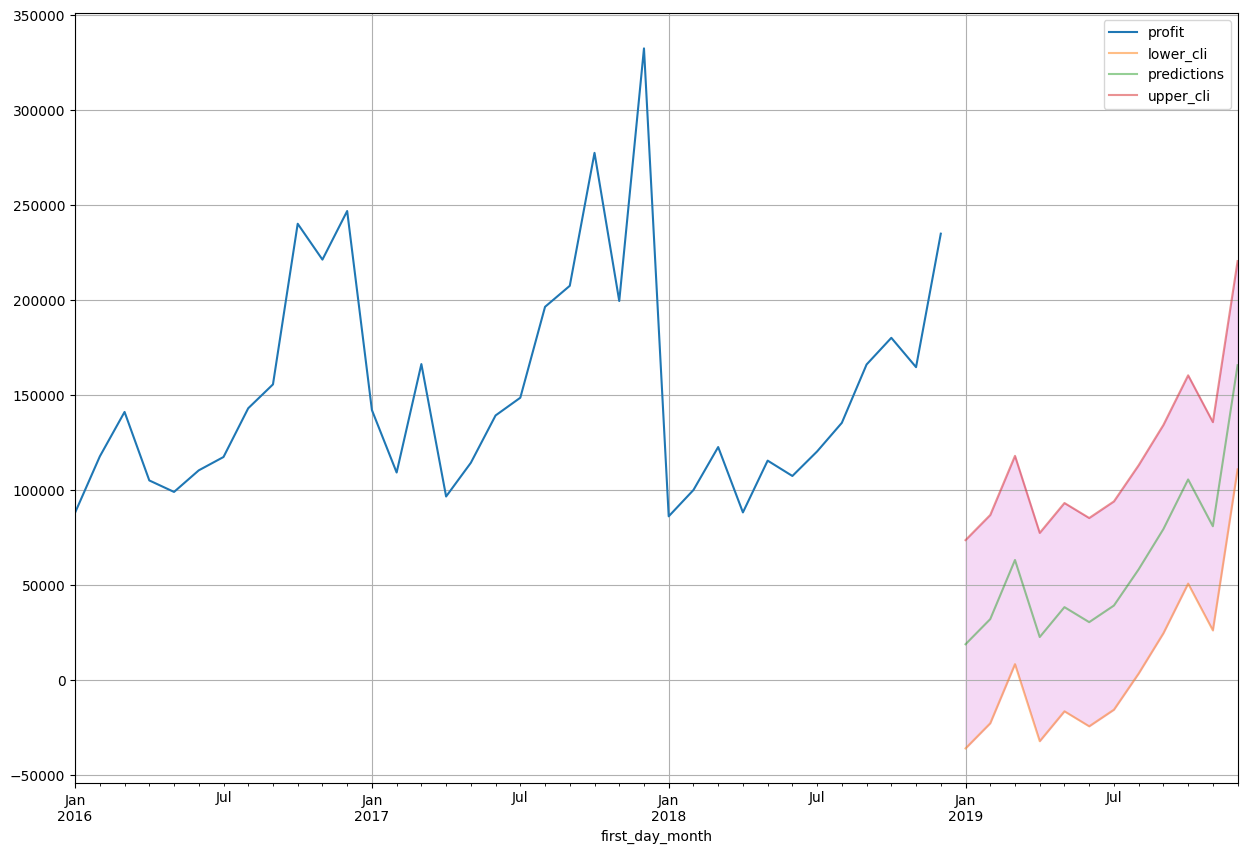

In [747]:
axis = sample_pink.plot(label = 'actual', figsize = (15, 10))
pred_df.plot(ax = axis, label = 'forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_cli'], pred_df['upper_cli'], color = 'm', alpha = 0.15)

plt.legend(loc = 'best')
plt.grid()
plt.show()

##### Yellow Cab Company

In [748]:
# yellow cab
sample_yellow = sample.loc[sample['company'] == 'yellow cab']
sample_yellow = sample_yellow[['first_day_month', 'profit']]
sample_yellow = sample_yellow.set_index('first_day_month')
sample_yellow.head()

,profit
first_day_month,
2016-01-01,918589.31
2016-02-01,1082505.94
2016-03-01,1041689.10
2016-04-01,1003927.26
2016-05-01,1247419.75


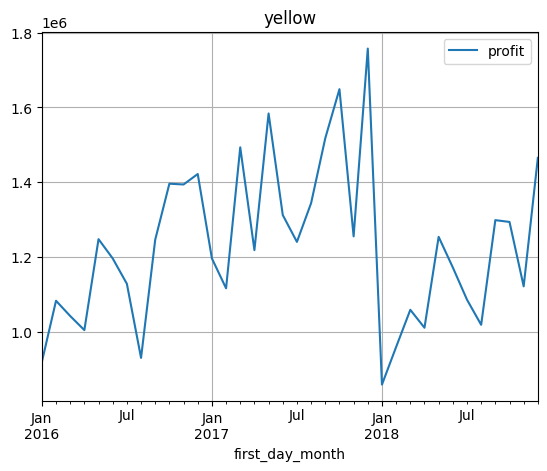

In [749]:
sample_yellow.plot().set_title('yellow')
plt.grid()
plt.show()

In [750]:
# yellow limitations
train_yellow = sample_yellow[sample_yellow.index.year <= 2018]
test_yellow = sample_yellow[sample_yellow.index.year > 2017]

print(train_yellow.shape)
print(test_yellow.shape)

(36, 1)
(12, 1)


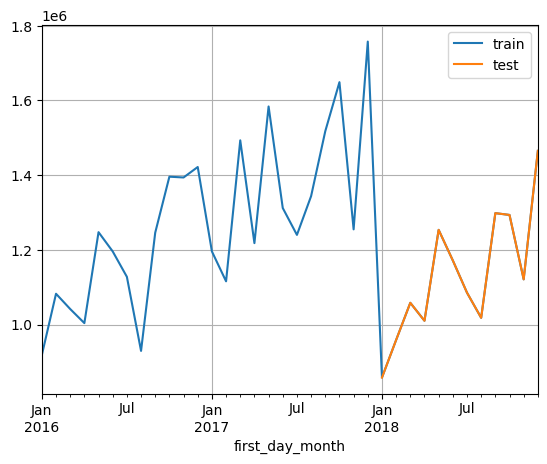

In [751]:
# train and test viz
train_yellow['profit'].plot()
test_yellow['profit'].plot()

plt.grid()
plt.legend(['train', 'test'])
plt.show()

In [752]:
# yellow time
train_yt = [i + 1 for i in  range(len(train_yellow))]
test_yt = [i + 1 for i in range(len(test_yellow))]
len(train_yt), len(test_yt)

(36, 12)

In [753]:
# add into df
train_yellow['time'] = train_yt
test_yellow['time'] = test_yt

C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\2872544927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_yellow['time'] = test_yt


In [754]:
# linear Regression train
lr = LinearRegression()
lr.fit(train_yellow[['time']], train_yellow['profit'].values)
train_yellow.head()

,profit,time
first_day_month,,
2016-01-01,918589.31,1
2016-02-01,1082505.94,2
2016-03-01,1041689.10,3
2016-04-01,1003927.26,4
2016-05-01,1247419.75,5


C:\Users\Prasetya\AppData\Local\Temp\ipykernel_6680\3569838140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_yellow['forecast'] = test_pred_model


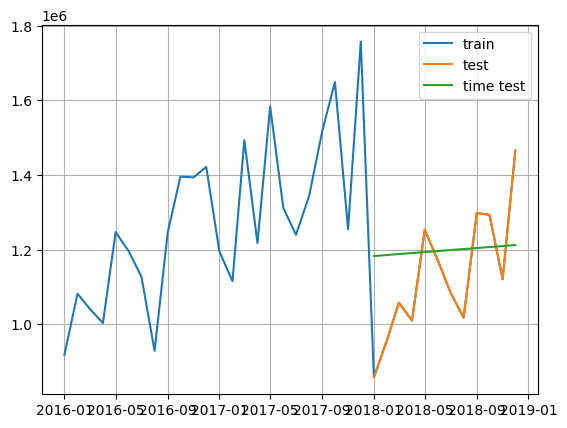

In [755]:
# linear Regression test
test_pred_model = lr.predict(test_yellow[['time']])
test_yellow['forecast'] = test_pred_model

plt.plot(train_yellow['profit'], label = 'train')
plt.plot(test_yellow['profit'], label = 'test')
plt.plot(test_yellow['forecast'], label = 'time test')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [756]:
# Mean Absolute Percentage Error
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual)) * 100, 2)

In [757]:
# 
mape_test = mape(test_yellow['profit'].values, test_pred_model)
print('Mean Absolute Percentage Error is: %3.3f'%(mape_test), '%')

Mean Absolute Percentage Error is: 13.860 %


In [758]:
# regression on time
result = pd.DataFrame({'Test MAPE (%)': [mape_test]}, index = ['Regression_on_time'])
result

,Test MAPE (%)
Regression_on_time,13.86


In [759]:
# smoothing
final_model = ExponentialSmoothing(sample_yellow, trend = 'additive', seasonal = 'additive').fit(smoothing_level = 0.4, smoothing_trend = 0.3, smoothing_seasonal = 0.6)

d:\GIT\data_project_cab_industry_in_us\my_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [760]:
Mape_final_model = mape(sample_yellow['profit'].values, final_model.fittedvalues)
print('Mean Absolute Percentage Error is: ', Mape_final_model)

Mean Absolute Percentage Error is:  9.29


In [761]:
# 
predictions = final_model.forecast(steps = len(test_yellow))

In [762]:
pred_df = pd.DataFrame({'lower_cli':predictions - 1.96 * np.std(final_model.resid, ddof = 1), 
                        'predictions':predictions, 
                        'upper_cli':predictions + 1.96 * np.std(final_model.resid, ddof = 1)})
pred_df.head()

,lower_cli,predictions,upper_cli
2019-01-01,415141.589736,7.137145e+05,1.012287e+06
2019-02-01,564345.490348,8.629184e+05,1.161491e+06
2019-03-01,758468.976720,1.057042e+06,1.355615e+06
2019-04-01,689825.344870,9.883982e+05,1.286971e+06
2019-05-01,943414.291345,1.241987e+06,1.540560e+06


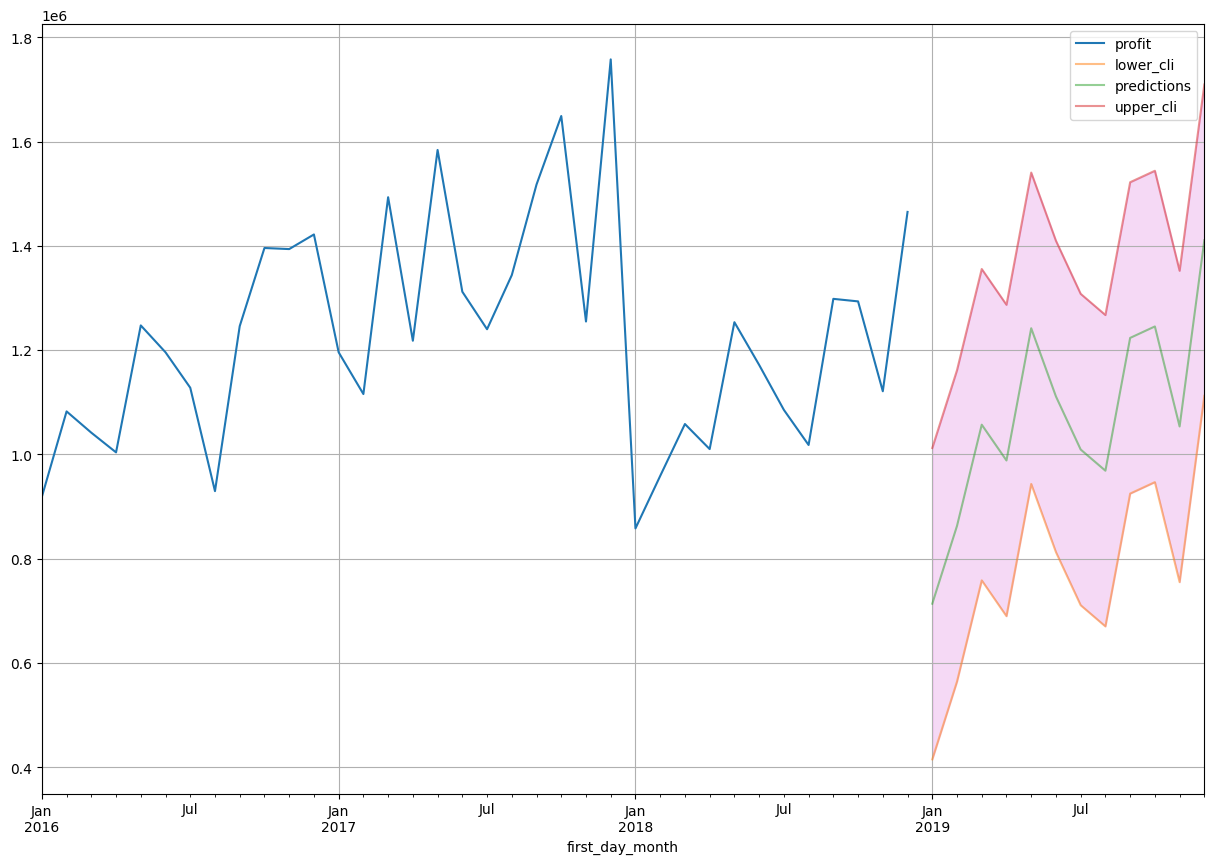

In [763]:
axis = sample_yellow.plot(label = 'actual', figsize = (15, 10))
pred_df.plot(ax = axis, label = 'forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_cli'], pred_df['upper_cli'], color = 'm', alpha = 0.15)

plt.legend(loc = 'best')
plt.grid()
plt.show()